### 1) Collect Data and construct D

In [163]:
#Collect data and construct D
#simply read in the training set. 

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#need to read csv files
data_all = pd.read_csv('../data/training_set.csv')
metadata_all = pd.read_csv('../data/training_set_metadata.csv')



### 1a) Divide D into D'' and D_test. Set D_test aside.

In [164]:
labels_all = pd.DataFrame(metadata_all.iloc[:, 11], columns = ['target'])
metadata_all = metadata_all.drop(['target'], axis = 1)

Dpp_metadata, Dtest_metadata, Dpp_labels, Dtest_labels = train_test_split(metadata_all, labels_all, test_size = 0.2, random_state = 888) 

Dpp_metadata['target'] = Dpp_labels['target']
Dtest_metadata['target'] = Dtest_labels['target']

Dtest_time_series = data_all.loc[data_all['object_id'].isin(Dtest_metadata.loc[:, 'object_id'])]
Dpp_time_series = data_all.loc[data_all['object_id'].isin(Dpp_metadata.loc[:, 'object_id'])]

Dpp_time_series.to_csv(path_or_buf = '../data/all_training_set.csv', index = False)
Dtest_time_series.to_csv(path_or_buf = '../data/all_test_set.csv', index = False)
Dpp_metadata.to_csv(path_or_buf = '../data/all_training_set_metadata.csv', index = False)
Dtest_metadata.to_csv(path_or_buf = '../data/all_test_set_metadata.csv', index = False)

#read data. this is D''
Dpp = pd.read_csv('../data/all_training_set.csv')
Dpp_metadata = pd.read_csv('../data/all_training_set_metadata.csv')

#read test data. This is D_test
test_set = pd.read_csv('../data/all_test_set.csv')
test_set_metadata = pd.read_csv('../data/all_test_set_metadata.csv')

print('The size of D'' is:')
display(Dpp_metadata.shape)
display(Dpp['object_id'].value_counts().shape)
display(Dpp)
print('The size of Dtest (the test set) is:')
display(test_set_metadata.shape)
display(test_set['object_id'].value_counts().shape)
display(test_set)

/home/aushtin/Desktop/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


The size of D is:


(6278, 12)

(6278,)

object_id         mjd  passband         flux   flux_err  detected
0              615  59750.4229         2  -544.810303   3.622952         1
1              615  59750.4306         1  -816.434326   5.553370         1
2              615  59750.4383         3  -471.385529   3.801213         1
3              615  59750.4450         4  -388.984985  11.395031         1
4              615  59752.4070         2  -681.858887   4.041204         1
5              615  59752.4147         1 -1061.457031   6.472994         1
6              615  59752.4224         3  -524.954590   3.552751         1
7              615  59752.4334         4  -393.480225   3.599346         1
8              615  59752.4435         5  -355.886780  10.421921         1
9              615  59767.2968         2  -548.013550   3.462291         1
10             615  59767.3045         1  -815.188599   5.293019         1
11             615  59767.3122         3  -475.516052   3.340643         1
12             615  59767.3233         4  -405.663818   3.496113         1
13             615  59767.3343         5  -421.199066   6.377517         1
14             615  59770.2179         2  -554.903198   3.927843         1
15             615  59770.2256         1  -820.042786   5.875329         1
16             615  59770.2334         3  -477.004730   3.736262         1
17             615  59770.2445         4  -400.270386   3.834955         1
18             615  59770.2557         5  -415.286896   7.435979         1
19             615  59779.3188         2  -630.523682   4.333287         1
20             615  59779.3265         1  -921.002502   6.306800         1
21             615  59779.3342         3  -518.533997   3.915225         1
22             615  59779.3452         4  -422.184509   4.089213         1
23             615  59779.3562         5  -422.815094   8.124096         1
24             615  59782.1897         2  -280.039520   2.819228         1
25             615  59782.1974         1  -449.095612   4.028310         1
26             615  59782.2051         3  -316.704865   3.491153         1
27             615  59782.2162         4  -332.885437   4.021619         1
28             615  59782.2274         5  -365.075775   8.514805         1
29             615  59797.2861         2   391.399231   3.098059         1
...            ...         ...       ...          ...        ...       ...
1135393  130779836  60464.2127         2     3.294472  23.675900         0
1135394  130779836  60466.2566         0   113.988297  57.096981         0
1135395  130779836  60490.1588         2    12.464979  23.430984         0
1135396  130779836  60491.1907         1   -13.734149  19.639900         0
1135397  130779836  60496.1248         2   -14.478923  23.485855         0
1135398  130779836  60497.1472         3    12.178056  15.891281         0
1135399  130779836  60498.1867         3   -20.815857  19.349518         0
1135400  130779836  60499.1367         0    54.361107  40.085011         0
1135401  130779836  60503.1145         3     9.912425  27.719427         0
1135402  130779836  60505.1075         2    17.719660  23.651981         0
1135403  130779836  60506.0962         5   -86.457382  57.588879         0
1135404  130779836  60510.2053         4   -39.215195  23.872086         0
1135405  130779836  60515.2731         5   -81.113083  46.094658         0
1135406  130779836  60524.0372         0   136.082718  61.556919         0
1135407  130779836  60525.0621         0    43.910740  59.821396         0
1135408  130779836  60526.1904         3    59.376686  27.732946         0
1135409  130779836  60528.0336         3     5.993599  27.752035         0
1135410  130779836  60530.0978         1     2.986908  19.109673         0
1135411  130779836  60536.0451         5     5.653964  53.119434         0
1135412  130779836  60537.1470         3   -41.850040  26.782366         0
1135413  130779836  60542.0489         4   -60.500492  14.743795         0
1135414  130779836  60543.0247    

The size of Dtest (the test set) is:


(1570, 12)

(1570,)

object_id         mjd  passband        flux   flux_err  detected
0             713  59825.2600         2    9.110147   1.013889         0
1             713  59825.2676         1    7.615042   1.160329         1
2             713  59825.2752         3    6.673631   1.932316         1
3             713  59825.2862         4    5.214194   3.018003         0
4             713  59825.2971         5   12.060948   7.163382         0
5             713  59839.2161         2    4.953065   1.196956         0
6             713  59839.2236         1    3.131028   1.351706         0
7             713  59839.2313         3    6.108739   1.789895         0
8             713  59839.2422         4    8.283792   2.527953         0
9             713  59839.2532         5    9.686500   5.882469         0
10            713  59842.1987         2    6.472355   1.110572         0
11            713  59842.2064         1    5.914848   1.134476         1
12            713  59842.2140         3    5.311658   1.683777         0
13            713  59842.2250         4    4.680908   2.349234         0
14            713  59842.2359         5    6.921503   5.573885         0
15            713  59851.2006         0    7.267655   2.866838         0
16            713  59854.2089         2    3.945918   0.922779         0
17            713  59854.2165         1    2.956484   0.953529         0
18            713  59854.2242         3    4.768611   1.422675         0
19            713  59854.2351         4    4.065430   1.943197         0
20            713  59854.2461         5    1.290383   3.980583         0
21            713  59857.1879         2    3.937931   2.088610         0
22            713  59857.1956         1   -2.223347   2.861396         0
23            713  59857.2032         3   -0.476698   2.280299         0
24            713  59857.2141         4    8.054095   2.712542         0
25            713  59857.2251         5   -9.332252   5.174713         0
26            713  59867.1600         2    1.380378   1.105223         0
27            713  59867.1676         1    1.569406   1.369900         0
28            713  59867.1753         3    1.433712   1.730335         0
29            713  59867.1862         4    5.299760   2.530279         0
...           ...         ...       ...         ...        ...       ...
286252  130684460  60441.9671         4   68.789093  23.553371         0
286253  130684460  60446.9678         5  -14.167624  37.536617         0
286254  130684460  60592.3652         3 -102.032936  23.959137         0
286255  130684460  60592.3765         5  -22.118319  24.238285         0
286256  130684460  60595.3772         4  -22.745358  22.771694         0
286257  130684460  60596.3720         5  -49.164928  32.512291         0
286258  130684460  60603.3617         4  -97.015320  18.095453         0
286259  130684460  60611.3654         4  -67.087433  17.995991         0
286260  130684460  60612.3440         0   56.374138  23.953972         0
286261  130684460  60612.3578         4   34.272865  16.863335         0
286262  130684460  60613.3454         0   -8.681022  23.607048         0
286263  130684460  60616.3172         2 -283.750183  16.803749         1
286264  130684460  60619.3151         1  -76.880257  15.340856         0
286265  130684460  60620.3056         2  127.987053  16.897877         0
286266  130684460  60621.3320         3  -37.012535   9.685491         0
286267  130684460  60622.3244         2  -63.745823  16.573709         0
286268  130684460  60629.2796         5  -16.119892  19.158447         0
286269  130684460  60630.3552         4 -143.475861  34.518681         0
286270  130684460  60631.2940         4   36.982517  23.467081         0
286271  130684460  60644.2447         1   67.681351  15.639363         1
286272  130684460  60646.2559         0  -20.528391  12.956310         0
286273  130684460  60647.2674         2  114.139580  11.884579         1
286274  130684460  60648.2234         2 -133.660553  11.867332    

### 1b) Divide D'' into D' and D_pt.

In [165]:
Dpp_labels = pd.DataFrame(Dpp_metadata.iloc[:, 11], columns = ['target'])
Dpp_metadata = Dpp_metadata.drop(['target'], axis = 1)

#D' = training set. D_pt = pretraining set.
training_set_metadata, pretraining_set_metadata, training_labels, pretraining_labels = train_test_split(Dpp_metadata, Dpp_labels, test_size = 0.1, random_state = 888)
training_set_metadata['target'] = training_labels['target']
pretraining_set_metadata['target'] = pretraining_labels['target']

pretraining_set = data_all.loc[data_all['object_id'].isin(pretraining_set_metadata.loc[:, 'object_id'])]
training_set = data_all.loc[data_all['object_id'].isin(training_set_metadata.loc[:, 'object_id'])]

print('The size of D_pt (the pretraining set) is:')
display(pretraining_set_metadata.shape)
display(pretraining_set['object_id'].value_counts().shape)
print('The size of D\' (the training set) is:')
display(training_set_metadata.shape)
display(training_set['object_id'].value_counts().shape)

/home/aushtin/Desktop/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


The size of D_pt (the pretraining set) is:


(628, 12)

(628,)

The size of D' (the training set) is:


(5650, 12)

(5650,)

16    77
65    63
92    14
6     11
53     4
Name: target, dtype: int64

90    193
42    101
62     40
15     35
88     34
52     17
95     15
67     15
64      9
Name: target, dtype: int64

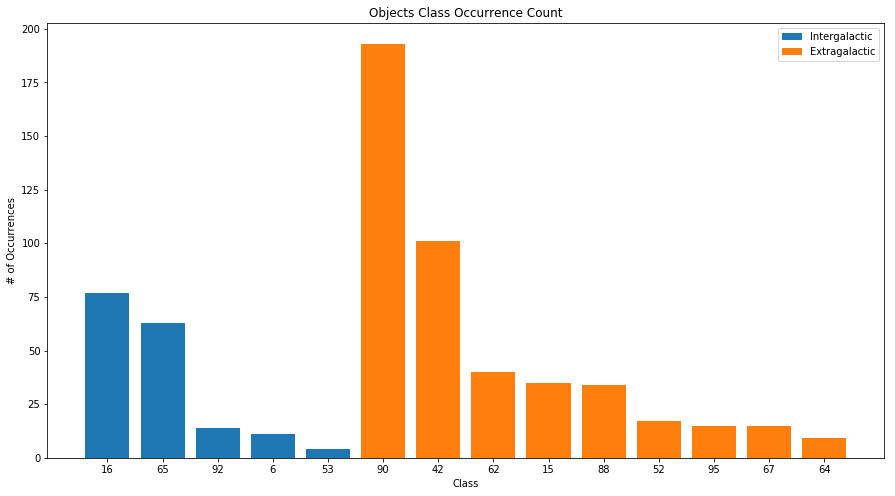

In [171]:
#visualize data in pretraining set

#metadata
class_counts = pretraining_set_metadata['target'].value_counts()


# plt.bar([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], class_counts)
# plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], class_counts.index)
# plt.xlabel('Class')
# plt.ylabel('# of Occurrences')
# plt.title('Objects Class Occurrence Count')

#we know that the metadata provides a feature that identifies objects as intergalactic (inside our galaxy) and extragalactic (outside our galaxy).  objects. 

ig = pretraining_set_metadata.loc[pretraining_set_metadata['hostgal_specz'] == 0]
ig_class_counts = ig['target'].value_counts()

display(ig_class_counts)

eg = pretraining_set_metadata.loc[pretraining_set_metadata['hostgal_specz'] != 0]
eg_class_counts = eg['target'].value_counts()

display(eg_class_counts)

total_classes = ig_class_counts.size + eg_class_counts.size

plt.bar(range(0, ig_class_counts.size), ig['target'].value_counts())
plt.bar(range(ig_class_counts.size, total_classes), eg['target'].value_counts())
plt.xticks(range(0, total_classes), ig_class_counts.index.tolist() + eg_class_counts.index.tolist())
# plt.xticks(range(ig_class_counts.size, total_classes), eg_class_counts.index)
plt.xlabel('Class')
plt.ylabel('# of Occurrences')
plt.title('Objects Class Occurrence Count')
plt.legend(['Intergalactic', 'Extragalactic'])

In [172]:
#Count the pretraining object id's
g = pretraining_set.groupby('object_id')
pt_obj_list = []
for name, group in g:
    pt_obj_list.append(name)
    
print('There are', len(pt_obj_list), 'objects in the pretraining set.\n')

There are 628 objects in the pretraining set.



Text(0,0.5,'flux')

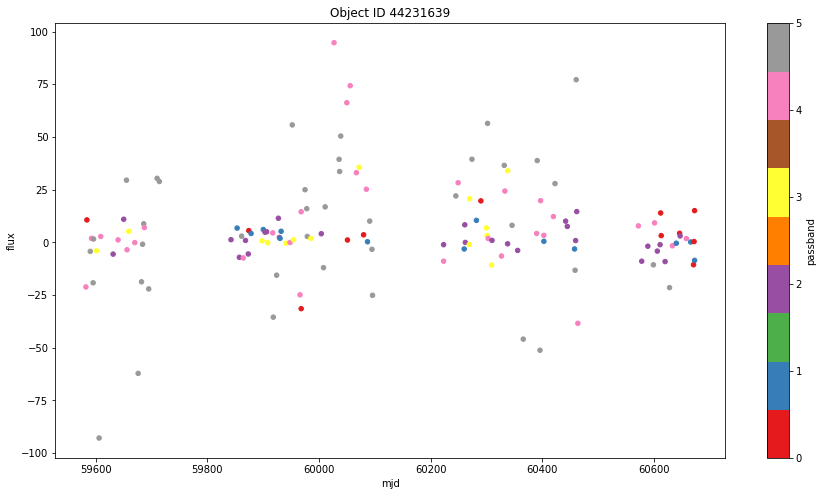

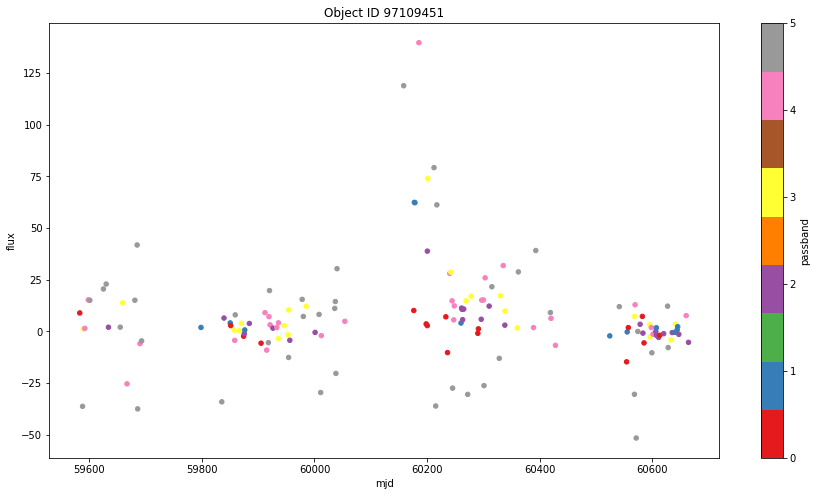

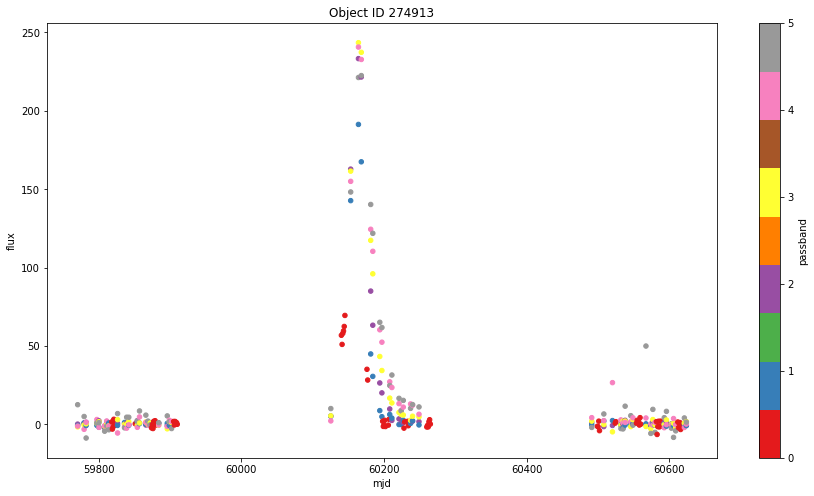

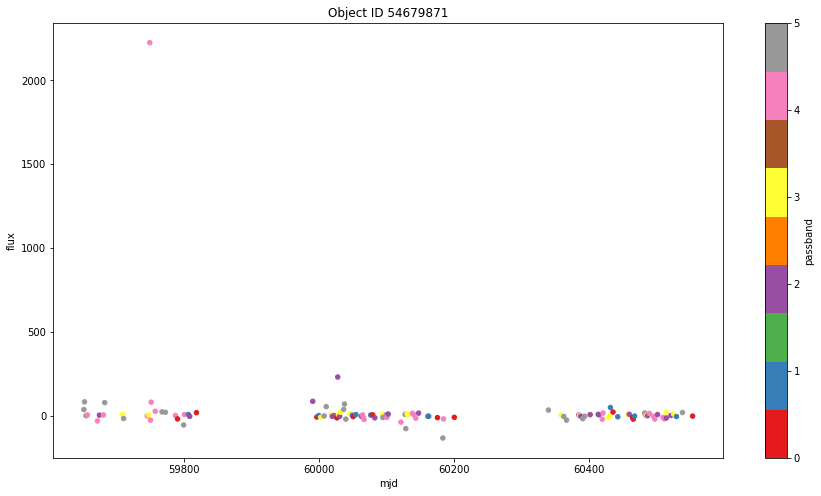

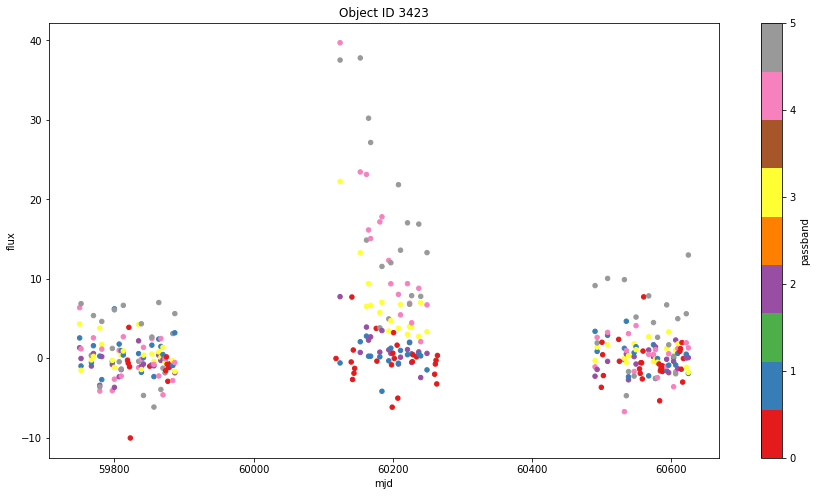

In [173]:
#plot a few light curves

import matplotlib.cm as cmap
import random

plt.rcParams['figure.figsize'] = [15, 8]

obj_id1 = random.choice(pt_obj_list)
obj_id = obj_id1
obj = g.get_group(obj_id)
obj1 = obj.copy()
fig, ax = plt.subplots()
ax = obj.plot.scatter(x = 'mjd', y = 'flux', c = 'passband', cmap = cmap.get_cmap('Set1'), title = 'Object ID ' + str(obj_id), ax = ax )
ax.set_xlabel('mjd')
ax.set_ylabel('flux')

obj_id2 = random.choice(pt_obj_list)
obj_id = obj_id2
obj = g.get_group(obj_id)
obj2 = obj.copy()
fig, ax = plt.subplots()
ax = obj.plot.scatter(x = 'mjd', y = 'flux', c = 'passband', cmap = cmap.get_cmap('Set1'), title = 'Object ID ' + str(obj_id), ax = ax )
ax.set_xlabel('mjd')
ax.set_ylabel('flux')

obj_id3 = random.choice(pt_obj_list)
obj_id = obj_id3
obj = g.get_group(obj_id)
obj3 = obj.copy()
fig, ax = plt.subplots()
ax = obj.plot.scatter(x = 'mjd', y = 'flux', c = 'passband', cmap = cmap.get_cmap('Set1'), title = 'Object ID ' + str(obj_id), ax = ax )
ax.set_xlabel('mjd')
ax.set_ylabel('flux')

obj_id4 = random.choice(pt_obj_list)
obj_id = obj_id4
obj = g.get_group(obj_id)
obj4 = obj.copy()
fig, ax = plt.subplots()
ax = obj.plot.scatter(x = 'mjd', y = 'flux', c = 'passband', cmap = cmap.get_cmap('Set1'), title = 'Object ID ' + str(obj_id), ax = ax )
ax.set_xlabel('mjd')
ax.set_ylabel('flux')

obj_id5 = random.choice(pt_obj_list)
obj_id = obj_id5
obj = g.get_group(obj_id)
obj5 = obj.copy()
fig, ax = plt.subplots()
ax = obj.plot.scatter(x = 'mjd', y = 'flux', c = 'passband', cmap = cmap.get_cmap('Set1'), title = 'Object ID ' + str(obj_id), ax = ax )
ax.set_xlabel('mjd')
ax.set_ylabel('flux')



(628,)

(628,)

Text(17.2,0.5,'flux')

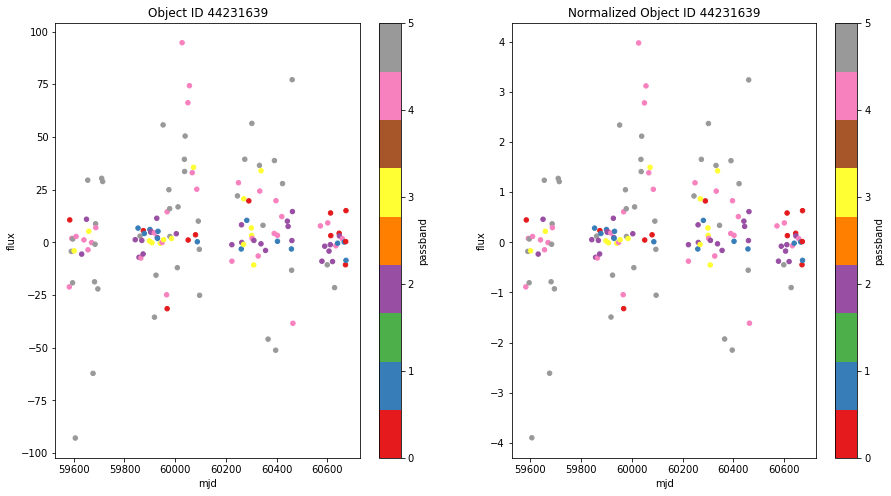

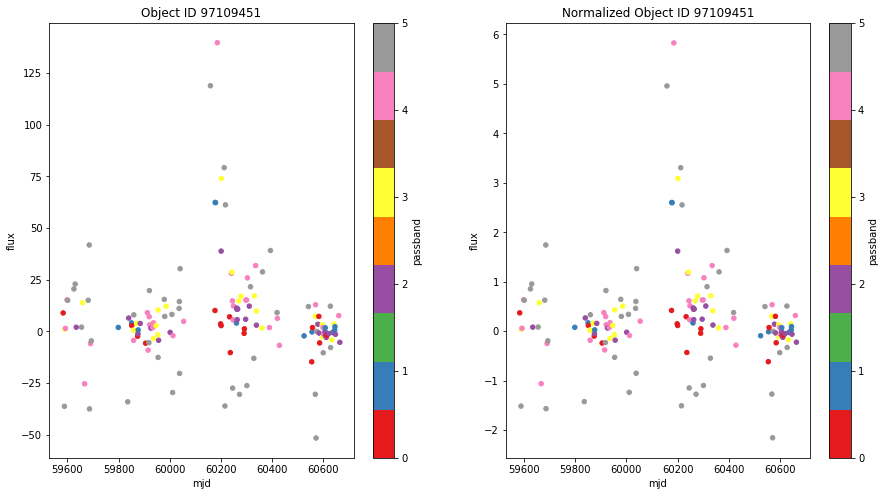

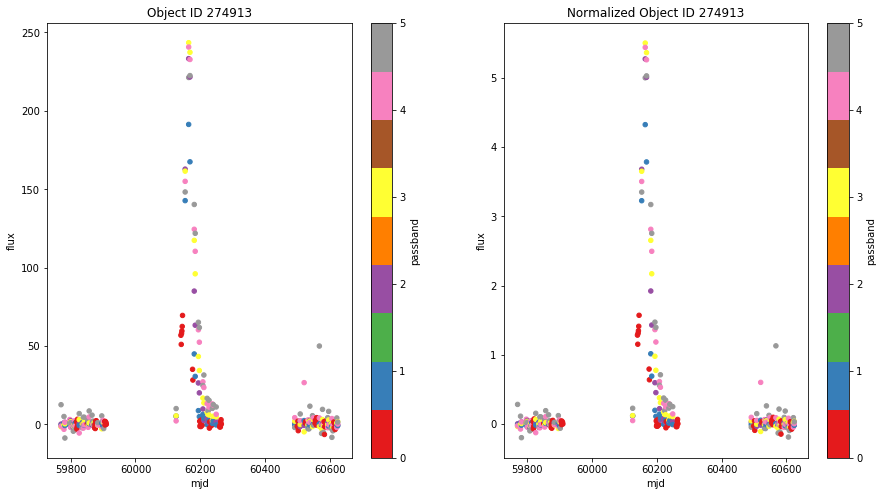

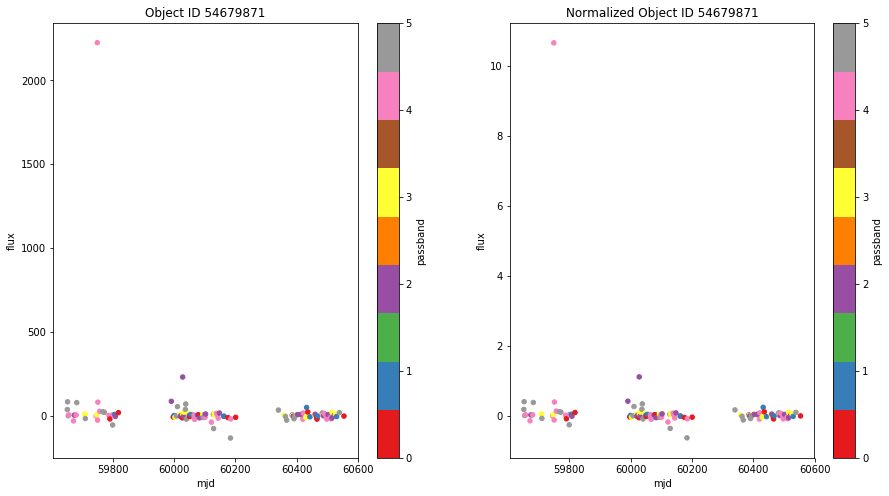

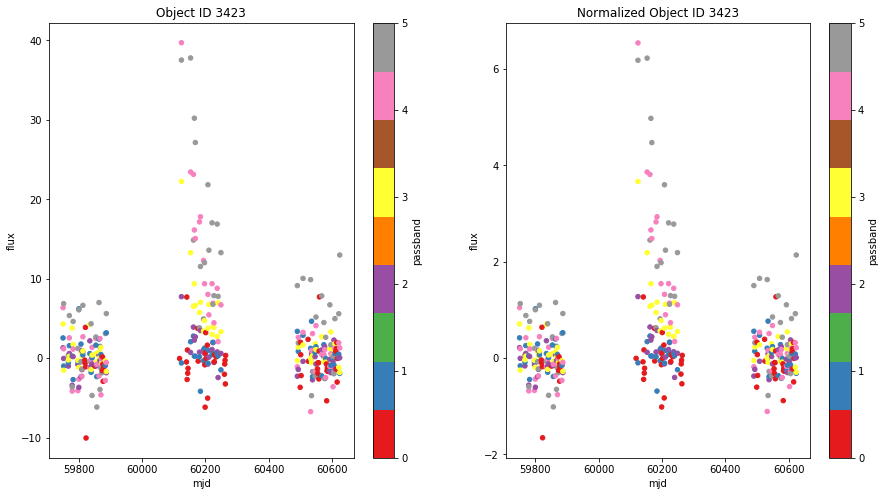

In [175]:
#preprocessing. normalize each time series independently.


# def normalize_ts(ts, metadata):

#     normalized_ts = ts.copy()
#     obj_ids = metadata.loc[:, 'object_id']
    
#     for id in obj_ids:
#         for pb in range(0, 6):
#             series = normalized_ts.loc[ (normalized_ts.loc[:, 'object_id'] == id) & (normalized_ts.loc[:,'passband'] == pb), 'flux']
#             mean = series.mean()
#             std = series.std()
#             normalized_ts.loc[ (normalized_ts.loc[:, 'object_id'] == id) & (normalized_ts.loc[:,'passband'] == pb), 'flux'] = series / std

#     return normalized_ts

def normalize_ts(ts, metadata):

    normalized_ts = ts.copy()
    obj_ids = metadata.loc[:, 'object_id']
    
    for id in obj_ids:
        for pb in range(0, 6):
            series = normalized_ts.loc[ (normalized_ts.loc[:, 'object_id'] == id), 'flux']
            mean = series.mean()
            std = series.std()
            normalized_ts.loc[ (normalized_ts.loc[:, 'object_id'] == id), 'flux'] = series / std

    return normalized_ts

normalized_pretraining_set = normalize_ts(pretraining_set, pretraining_set_metadata)

display(normalized_pretraining_set['object_id'].value_counts().shape)
display(pretraining_set['object_id'].value_counts().shape)

#Count the pretraining object id's
g = normalized_pretraining_set.groupby('object_id')
    
plt.rcParams['figure.figsize'] = [15, 8]

fig, [ ax1, ax2 ]  = plt.subplots(nrows = 1, ncols = 2)
obj_id = obj_id1
norm_obj1 = g.get_group(obj_id)

obj1.plot.scatter(x = 'mjd', y = 'flux', c = 'passband', cmap = cmap.get_cmap('Set1'), title = 'Object ID ' + str(obj_id), ax = ax1 )
norm_obj1.plot.scatter(x = 'mjd', y = 'flux', c = 'passband', cmap = cmap.get_cmap('Set1'), title = 'Normalized Object ID ' + str(obj_id), ax = ax2 )
ax.set_xlabel('mjd')
ax.set_ylabel('flux')

fig, [ ax1, ax2 ]  = plt.subplots(nrows = 1, ncols = 2)
obj_id = obj_id2
norm_obj2 = g.get_group(obj_id)

obj2.plot.scatter(x = 'mjd', y = 'flux', c = 'passband', cmap = cmap.get_cmap('Set1'), title = 'Object ID ' + str(obj_id), ax = ax1 )
norm_obj2.plot.scatter(x = 'mjd', y = 'flux', c = 'passband', cmap = cmap.get_cmap('Set1'), title = 'Normalized Object ID ' + str(obj_id), ax = ax2 )
ax.set_xlabel('mjd')
ax.set_ylabel('flux')

fig, [ ax1, ax2 ]  = plt.subplots(nrows = 1, ncols = 2)
obj_id = obj_id3
norm_obj3 = g.get_group(obj_id)

obj3.plot.scatter(x = 'mjd', y = 'flux', c = 'passband', cmap = cmap.get_cmap('Set1'), title = 'Object ID ' + str(obj_id), ax = ax1 )
norm_obj3.plot.scatter(x = 'mjd', y = 'flux', c = 'passband', cmap = cmap.get_cmap('Set1'), title = 'Normalized Object ID ' + str(obj_id), ax = ax2 )
ax.set_xlabel('mjd')
ax.set_ylabel('flux')

fig, [ ax1, ax2 ]  = plt.subplots(nrows = 1, ncols = 2)
obj_id = obj_id4
norm_obj4 = g.get_group(obj_id)

obj4.plot.scatter(x = 'mjd', y = 'flux', c = 'passband', cmap = cmap.get_cmap('Set1'), title = 'Object ID ' + str(obj_id), ax = ax1 )
norm_obj4.plot.scatter(x = 'mjd', y = 'flux', c = 'passband', cmap = cmap.get_cmap('Set1'), title = 'Normalized Object ID ' + str(obj_id), ax = ax2 )
ax.set_xlabel('mjd')
ax.set_ylabel('flux')

fig, [ ax1, ax2 ]  = plt.subplots(nrows = 1, ncols = 2)
obj_id = obj_id5
norm_obj5 = g.get_group(obj_id)

obj5.plot.scatter(x = 'mjd', y = 'flux', c = 'passband', cmap = cmap.get_cmap('Set1'), title = 'Object ID ' + str(obj_id), ax = ax1 )
norm_obj5.plot.scatter(x = 'mjd', y = 'flux', c = 'passband', cmap = cmap.get_cmap('Set1'), title = 'Normalized Object ID ' + str(obj_id), ax = ax2 )
ax.set_xlabel('mjd')
ax.set_ylabel('flux')



In [176]:
display(normalized_pretraining_set['object_id'].value_counts().shape)
display(pretraining_set['object_id'].value_counts().shape)

display(normalized_pretraining_set.shape)
display(pretraining_set.shape)

(628,)

(628,)

(113752, 6)

(113752, 6)

Text(17.2,0.5,'flux')

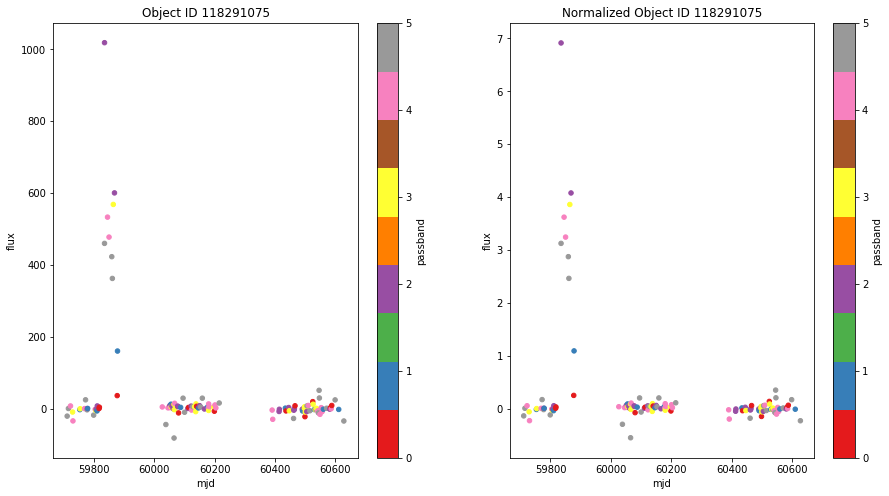

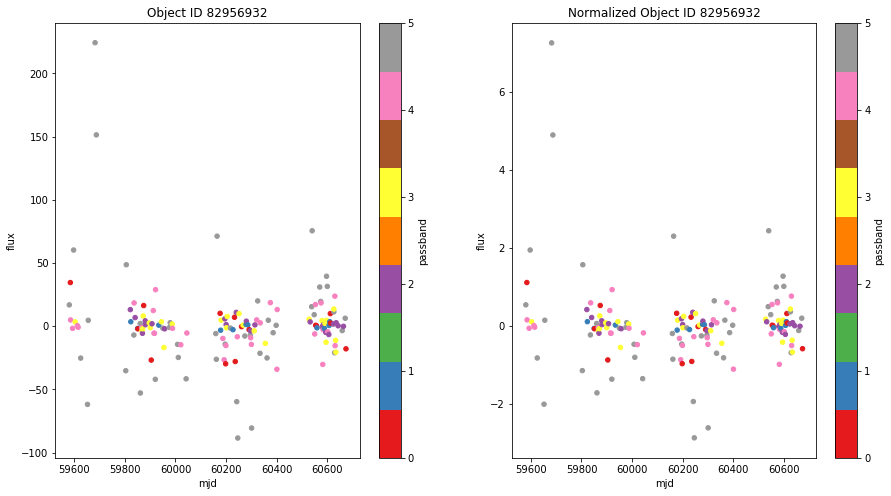

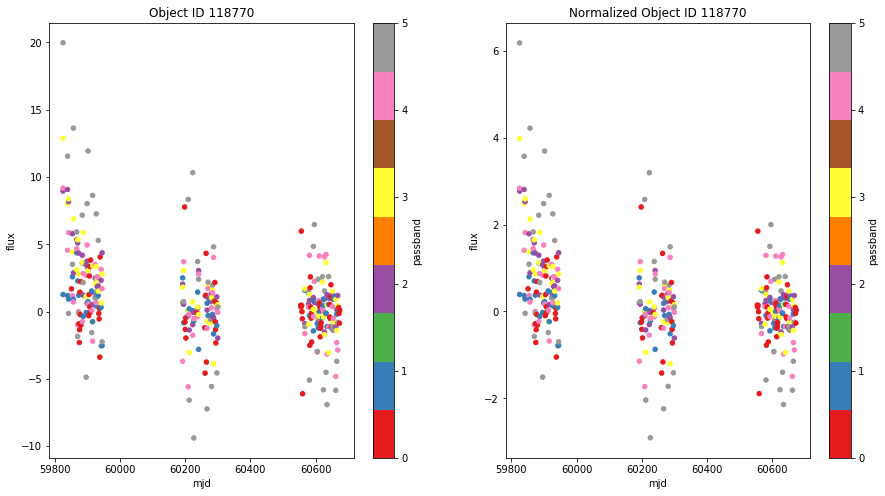

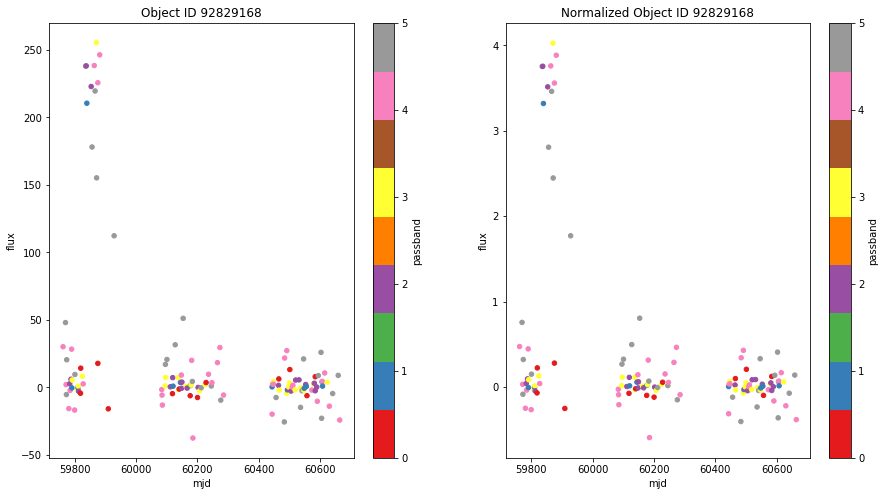

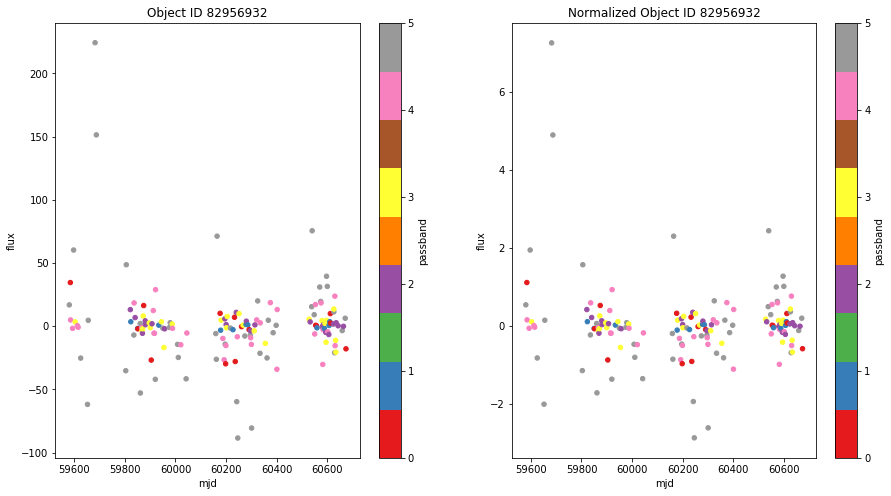

In [142]:
#show comparison between normalized and un-normalized plots
g = normalized_pretraining_set.groupby('object_id')
    
plt.rcParams['figure.figsize'] = [15, 8]

fig, [ ax1, ax2 ]  = plt.subplots(nrows = 1, ncols = 2)
obj_id = obj_id1
norm_obj1 = g.get_group(obj_id)

obj1.plot.scatter(x = 'mjd', y = 'flux', c = 'passband', cmap = cmap.get_cmap('Set1'), title = 'Object ID ' + str(obj_id), ax = ax1 )
norm_obj1.plot.scatter(x = 'mjd', y = 'flux', c = 'passband', cmap = cmap.get_cmap('Set1'), title = 'Normalized Object ID ' + str(obj_id), ax = ax2 )
ax.set_xlabel('mjd')
ax.set_ylabel('flux')

fig, [ ax1, ax2 ]  = plt.subplots(nrows = 1, ncols = 2)
obj_id = obj_id2
norm_obj2 = g.get_group(obj_id)

obj2.plot.scatter(x = 'mjd', y = 'flux', c = 'passband', cmap = cmap.get_cmap('Set1'), title = 'Object ID ' + str(obj_id), ax = ax1 )
norm_obj2.plot.scatter(x = 'mjd', y = 'flux', c = 'passband', cmap = cmap.get_cmap('Set1'), title = 'Normalized Object ID ' + str(obj_id), ax = ax2 )
ax.set_xlabel('mjd')
ax.set_ylabel('flux')

fig, [ ax1, ax2 ]  = plt.subplots(nrows = 1, ncols = 2)
obj_id = obj_id3
norm_obj3 = g.get_group(obj_id)

obj3.plot.scatter(x = 'mjd', y = 'flux', c = 'passband', cmap = cmap.get_cmap('Set1'), title = 'Object ID ' + str(obj_id), ax = ax1 )
norm_obj3.plot.scatter(x = 'mjd', y = 'flux', c = 'passband', cmap = cmap.get_cmap('Set1'), title = 'Normalized Object ID ' + str(obj_id), ax = ax2 )
ax.set_xlabel('mjd')
ax.set_ylabel('flux')

fig, [ ax1, ax2 ]  = plt.subplots(nrows = 1, ncols = 2)
obj_id = obj_id4
norm_obj4 = g.get_group(obj_id)

obj4.plot.scatter(x = 'mjd', y = 'flux', c = 'passband', cmap = cmap.get_cmap('Set1'), title = 'Object ID ' + str(obj_id), ax = ax1 )
norm_obj4.plot.scatter(x = 'mjd', y = 'flux', c = 'passband', cmap = cmap.get_cmap('Set1'), title = 'Normalized Object ID ' + str(obj_id), ax = ax2 )
ax.set_xlabel('mjd')
ax.set_ylabel('flux')

fig, [ ax1, ax2 ]  = plt.subplots(nrows = 1, ncols = 2)
obj_id = obj_id5
norm_obj5 = g.get_group(obj_id)

obj5.plot.scatter(x = 'mjd', y = 'flux', c = 'passband', cmap = cmap.get_cmap('Set1'), title = 'Object ID ' + str(obj_id), ax = ax1 )
norm_obj5.plot.scatter(x = 'mjd', y = 'flux', c = 'passband', cmap = cmap.get_cmap('Set1'), title = 'Normalized Object ID ' + str(obj_id), ax = ax2 )
ax.set_xlabel('mjd')
ax.set_ylabel('flux')

In [217]:
#extract some features. just extract a bunch.
import math

def extract_ts_features1(ts, metadata, features):
    obj_ids = metadata['object_id']
    print(len(obj_ids))
    cols = ['object_id']
    for i in range(0, 6):
        for f in features:
            cols.append(f + str(i))
    
    df_features = pd.DataFrame(columns = cols)
#     df_features = pd.DataFrame(columns = ['object_id', 'mean0', 'stddev0', 'med0', 'max0', 'min0', 'kurt0', 'skew0',  
#                                                    'mean1', 'stddev1', 'med1', 'max1', 'min1', 'kurt1','skew1',
#                                                    'mean2', 'stddev2', 'med2', 'max2', 'min2', 'kurt2', 'skew2',
#                                                    'mean3', 'stddev3', 'med3', 'max3', 'min3', 'kurt3', 'skew3', 
#                                                    'mean4', 'stddev4', 'med4', 'max4', 'min4', 'kurt4', 'skew4',
#                                                    'mean5', 'stddev5', 'med5', 'max5', 'min5', 'kurt5', 'skew5'])
                                                   
    index = 0         
    g = ts.groupby('object_id')
    for id in obj_ids:
        #print(i)
        obj = g.get_group(id)
        features = []
        pb_groups = obj.groupby('passband')
        for name, pbg in pb_groups:
            #find mean for each passband
            flux = pbg['flux']
            mean = flux.mean()
            stddev = flux.std()
            med = flux.median()
            max = flux.max()
            min = flux.min()
            kurt = flux.kurtosis(skipna = True)
            skew = flux.skew()
            diff = max - min
            features.extend([mean, stddev, med, max, min, kurt, skew, diff])
            #print('features for pb = ', name, ' are ', [mean, stddev, med, max, min, kurt])
            #print(features)

        df_features.loc[index, 'object_id'] = id
        df_features.loc[index, 1:49] = features
        index = index + 1
    return df_features

display(training_set_metadata.shape)
display(training_set['object_id'].value_counts().shape)

#normalized_training_set = normalize_ts(training_set, training_set_metadata)
#normalized_test_set = normalize_ts(test_set, test_set_metadata)

f_names = ['mean', 'stddev', 'med', 'max', 'min', 'kurt', 'skew', 'diff']

training_features = extract_ts_features1(normalized_training_set, training_set_metadata, f_names)
test_features = extract_ts_features1(normalized_test_set, test_set_metadata, f_names)

display(training_metadata.shape)
display(training_features.shape)

display(test_set_metadata.shape)
display(test_features.shape)
display(test_features)

(5650, 12)

(5650,)

5650
1570


(5650, 11)

(5650, 49)

(1570, 12)

(1570, 49)

object_id        mean0    stddev0         med0       max0       min0  \
0        272197  0.000750353  0.0749629    0.0180484   0.136448  -0.265558   
1      58755427     0.156021   0.228122     0.139924   0.566885  -0.222126   
2      35341109     0.200889   0.443035     0.135511    1.47331  -0.366548   
3      81017882    0.0865492   0.404106   -0.0179118    1.34976  -0.207602   
4        304846    -0.870776   0.109601    -0.876421  -0.496576    -1.0333   
5      25176849     0.136994   0.323083    0.0979286   0.593107  -0.355098   
6      10777360      0.15413   0.665358  -0.00885701    2.44772  -0.198062   
7      88949087   -0.0390697  0.0836306   -0.0192303  0.0413388  -0.235216   
8     108771817   0.00444192   0.138554   -0.0327903   0.365064  -0.117703   
9      99468282     0.519503    1.08445  -0.00772125    3.22309  -0.275618   
10       331321    -0.107228   0.717967    -0.195852    5.33705  -0.976396   
11    118048579    0.0816009   0.189525    0.0568326   0.566646  -0.218632   
12     74818669     0.104313   0.473394  0.000323288    1.22221  -0.467316   
13     40757084     0.232368   0.914314   -0.0100549    3.18617  -0.350417   
14     25797702     0.289635   0.650071    0.0227715    1.62769  -0.116476   
15       214668    0.0218733   0.114254    0.0182111   0.480633  -0.221402   
16     80673882     0.052325    0.33856    0.0119502   0.659695  -0.470827   
17     21004292    0.0901233   0.136627     0.133329   0.199924 -0.0628829   
18    118945475      2.03972   0.749575      1.92207    3.43198   0.618253   
19       142867     0.181963   0.644045    0.0130188    3.02206 -0.0580186   
20     13160209     0.093179   0.317967    0.0594818    0.85279  -0.237729   
21       290322  -0.00473301   0.103136   -0.0149565   0.217895  -0.222004   
22       125762    -0.032213   0.289465  -0.00735875   0.592549   -0.93023   
23         9172   0.00114607   0.179975    0.0259903   0.436622  -0.408089   
24     42857334   -0.0443106   0.342764   -0.0134496    0.43377  -0.662646   
25     70317034   -0.0264865   0.174393   -0.0196502   0.236648  -0.352765   
26     56320877    -0.188221    0.49059    -0.332071   0.610751  -0.864458   
27    127947078      1.24458    2.18397    0.0853402     7.0056   -0.18625   
28      9839433      0.39692    1.43596    0.0602132    5.36974  -0.176991   
29     32550698     0.583106    1.72591    0.0716575    5.78102 -0.0765688   
...         ...          ...        ...          ...        ...        ...   
1540  115508066     0.848709    2.70928     0.123428    9.83639  -0.423687   
1541     197299    0.0166219  0.0866141     0.041547   0.135908  -0.262589   
1542   20796602     0.217453   0.332994     0.179284   0.827882   -0.39681   
1543   12398973    -0.336428   0.703288    -0.479178    1.17239    -1.4764   
1544    2258216     0.394459   0.786442    0.0543556    2.17851  -0.274106   
1545  111679787     0.101782   0.282567    0.0910147    0.73398   -0.41642   
1546   29356260     0.312783   0.902606     0.133712    1.44704  -0.800449   
1547   22408171    0.0132763  0.0924028   0.00402197   0.176096  -0.132327   
1548   79430982  -0.00650461  0.0887491    0.0151192   0.102976  -0.148506   
1549   98377483     -2.44706   0.714124     -2.18686   -1.07498   -3.53608   
1550      71084     0.287903   0.788578    0.0189644    3.18434 -0.0583817   
1551     259884     0.108079   0.600202      0.12532    1.56368   -1.65057   
1552     164805   -0.0200768   0.231461    -0.100137   0.443225  -0.297333   
1553   89908996    0.0430252    0.23354     0.032184   0.502042  -0.468069   
1554   87842606     0.377288    1.23446   -0.0117324     4.4603  -0.142472   
1555   33846439      0.10055    0.30945    0.0819723   0.658695  -0.321652   
1556     180290     0.114266    0.24214     0.054571   0.767367  -0.262572   
1557   61803685      0.20231   0.489361    0.0755323    1.69147   -0.23225   
1558     175185    0.0193106  0.0489959    0.0107649   0.215241 -0.0923111   
1559   28978765    -0.227351

In [191]:

# df_ts_features = training_features.iloc[:, 0:49]
# df_metadata = training_set_metadata.iloc[:, 0:11]
# df_metadata = df_metadata.reset_index(drop = True)
# training_labels = training_set_metadata.iloc[:, 11]

# display(df_ts_features)
# display(df_metadata)
# d_training_features = pd.concat([df_ts_features, df_metadata], axis = 1 )

# display(d_training_features)
# # display(normalized_training_set.shape)
# # display(training_set.shape)
# # display(training_features.shape)
# # display(training_labels.shape)

# # display(training_set_metadata.shape)
# # display(training_features.shape)

# # display(training_set['object_id'].value_counts().shape)

mean0  stddev0      med0     max0     min0     kurt0       skew0  \
0       3.05238  11.0445   1.87117  22.0766 -10.1554   1.48454    0.943887   
1      0.149476  2.35325  0.072091  6.34733 -5.19921  0.272332    0.207124   
2       -10.154  36.9936  -9.32396  48.4185 -66.7874  -1.06016   0.0571202   
3       3.12482  9.46698  0.924115  45.3659 -5.09429   10.6982     3.34538   
4       2.84988  13.1989  -1.49693  34.3357 -13.0459   1.65995     1.31281   
5       4.49623  39.5385   2.14018  84.3878 -64.9254   1.54069    0.351155   
6       113.427  142.904   35.2479  345.891 -14.9453  -1.26444    0.821743   
7       1.58403   4.7073  0.447716  16.6429  -6.5501    2.4339     1.45118   
8        10.768  41.2094   1.92275  130.364 -26.4801   8.98885     2.85799   
9      0.292203  8.41478   -1.4082  24.8891 -8.77288   5.44856     1.98965   
10     -5.56038  10.1436  -1.63645    6.367 -24.7656 -0.626935   -0.758792   
11    0.0958744  2.34894 -0.030959  4.88176 -4.77982  -0.21006   -0.168283   
12     0.304937  3.27776 -0.130787  17.2882 -4.37747   14.5265     3.21302   
13      2.83419  7.68407   5.88954  10.9055 -16.5144   2.20508    -1.50639   
14     -3.40098   8.6135  -4.04107  13.3583 -13.7104 -0.621131    0.459568   
15      1.37402  3.69911   1.17215  21.9703 -3.27265   14.5931     2.91058   
16     -1.56457  16.5489  -7.87289  40.1979 -20.0833   2.33269     1.45517   
17      -8.6188  2.90645  -8.86279  4.15879 -17.2043   5.55609    0.921819   
18     -3.42037  9.90426  -3.99785  8.34737 -18.0368  -1.41087   -0.123544   
19       2.4381  9.89022   1.49205  16.5287 -19.4165   0.18673   -0.640581   
20    -0.433363  2.38588 -0.470362  6.24797 -4.45304   1.01397    0.749449   
21      14.7775  56.3298 -0.502571   230.41 -9.54081   15.9137     3.94225   
22      20.0836  67.4326  0.683769  216.307  -32.638   9.07399     2.91235   
23     -5.51917  21.7861  0.411654   29.462 -35.1336 -0.220307    0.198815   
24      18.5107  25.6301   23.1724  60.2054 -23.3818  -0.99188  -0.0620266   
25     -17.7329  35.7591  -5.61904  28.7359  -73.111  -1.23682   -0.446534   
26      12.1409  47.4122   6.98491  142.349 -58.1311   7.15001     2.12576   
27     -3.50606  18.9101  -3.19417  23.8171 -30.3554  -1.37821  -0.0824058   
28      2.04152  26.7746  -3.32575  82.5982 -20.1031   9.03566     2.82766   
29       4.5536  10.7412   5.00604  24.3844 -9.71653  -0.41555    0.354531   
...         ...      ...       ...      ...      ...       ...         ...   
5620   0.462929  2.26357  0.148451  9.01423 -3.70907   2.58433     1.10478   
5621    5.66905  51.9989   24.9376  66.2213 -86.8627  0.403961   -0.908198   
5622   -3.36535  17.1471 -0.631406  26.1426  -36.266 -0.491001  -0.0194622   
5623   -7.37033  27.0257  -3.51838  27.0591 -52.4467 -0.548378   -0.737305   
5624   0.234151  7.58461 -0.737097  13.9566 -13.9944 -0.072885 -0.00535217   
5625   -21.8487  69.9488  -25.7773  124.995 -119.579   1.13099    0.733637   
5626  -0.630692  6.83802 -0.534296   10.787 -16.0826  0.538676   -0.495702   
5627     -1.132  8.01715  -1.54561  12.0273 -19.2969   3.09117    -0.93073   
5628     12.052  29.2552    6.2235   95.565 -12.4704   8.15553     2.70806   
5629  0.0251299  8.65575  -0.97073  14.7117 -12.7511 -0.733005    0.292521   
5630   0.136686  10.3979   1.83887  14.0828 -21.8968   0.83591   -0.932102   
5631  -0.811036  8.37363   -1.2889  22.6719  -11.761   6.32704     2.04285   
5632    3.40363   9.5149   2.69679  18.0509 -10.7266  -1.15569   -0.037179   
5633   -82.9444   114.67  -69.4737  29.1187  -362.79    5.2936    -2.08437   
5634    8.73175  12.5492   7.22173  36.2845 -10.6567  0.702259    0.568434   
5635  -0.551942  10.0622  -1.17656  16.4933 -17.2763 -0.842145  -0.0464677   
5636   0.500662  7.63959  -1.07293  16.7288 -10.3293   1.36767    0.952784   
5637    1.71087  14.6212  -1.78434   32.609 -17.9189   1.00928    0.934366   
5638  -0.316542  3.21071 -0.519599  10.7109 -6.67644   3.88592     1.08534   
5639   -5.62182  15.4584  -2.017

object_id          ra       decl       gal_l      gal_b  ddf  \
0     123772130  136.230469   1.492246  228.178815  30.082972    0   
1        217593  349.429535 -62.508568  320.039643 -51.393745    1   
2     125405685  263.671875  -1.342993   22.685122  16.363965    0   
3        101298   34.277344  -5.079716  169.526841 -59.956640    1   
4      74516485  190.622314 -46.375080  301.322595  16.468703    0   
5      87175959  242.578125 -32.619843  344.361443  13.818555    0   
6      20283060  239.941406 -22.669609  349.959913  22.549058    0   
7         36783  349.966217 -62.696659  319.542989 -51.376556    1   
8     124867427  289.511719 -29.313198    8.708269 -18.248545    0   
9      17011351   44.121094  -9.291553  187.734287 -55.528568    0   
10     57927713  353.119843 -44.597992  339.920110 -66.439230    0   
11       128746  152.050781   2.985506  237.495952  44.143927    1   
12       231741  358.665253 -45.783966  330.353593 -68.203652    1   
13     77033938  333.457031 -22.993395   30.648141 -54.211422    0   
14     30415620  332.929688 -11.262980   47.968629 -49.322169    0   
15       158731  347.846710 -64.760857  318.929827 -49.143596    1   
16     35012811    4.346591 -57.399525  311.875320 -59.133553    0   
17        45115    2.097458 -45.783966  324.737840 -69.478613    1   
18    113533602  169.804688 -28.801123  279.621655  29.862804    0   
19     81889909   88.242188 -28.801123  234.075544 -24.613489    0   
20       188377  152.050781   3.284369  237.157374  44.318466    1   
21    125554681   17.050781 -21.061817  156.052323 -82.829380    0   
22    112273036  184.394531 -30.345182  294.320440  31.959755    0   
23     53856704  166.224487 -44.003082  283.448497  14.801168    0   
24     82246622  188.085938 -39.644398  298.937810  23.079223    0   
25     20630488  230.105042 -45.389202  328.497855   9.958814    0   
26    114975586  292.500000 -29.142223    9.864088 -20.623810    0   
27    116541363  239.589844 -12.941632  357.552743  29.499104    0   
28     43392755   71.894531 -21.702768  220.872810 -36.446419    0   
29     82839667  174.902344  -8.084014  274.105032  50.723388    0   
...         ...         ...        ...         ...        ...  ...   
5620     208704   33.222656  -4.780192  167.515653 -60.396584    1   
5621   37768852  176.229050 -56.827923  293.889714   4.871417    0   
5622  100433423   11.601562  -7.331168  119.252402 -70.166960    0   
5623   72283619  289.335938 -38.873585  359.098073 -21.366435    0   
5624  114809828    6.503906 -31.738394  351.614450 -82.799137    0   
5625   28282774  257.519531  -4.780192   16.323171  19.973211    0   
5626  105345794   49.647888 -50.285809  262.636990 -53.724238    0   
5627   57820454   66.269531 -38.300922  241.163274 -44.341985    0   
5628   71816360  171.562500 -40.033035  285.720773  19.974571    0   
5629  102350999   59.414062 -22.508005  217.281914 -47.727071    0   
5630   32037298   25.488281  -5.379379  154.122127 -65.145784    0   
5631   43457925   66.621094 -35.318771  237.045996 -43.859840    0   
5632   25571966   29.692623 -44.201530  268.916310 -68.216391    0   
5633   95159385  278.299194 -44.201530  350.798170 -15.496329    0   
5634   86281789  241.171875  -0.447628   10.373890  36.038083    0   
5635   82798938   78.574219 -18.524391  219.854568 -29.468122    0   
5636    7300190  176.132812 -32.974850  287.087742  27.830038    0   
5637   62282842  121.289062 -14.631667  234.577964   9.035818    0   
5638     203970  150.117188   2.238686  236.784618  42.139082    1   
5639  118955467  320.976562 -17.426323   33.085653 -41.353800    0   
5640       1920  149.414062   3.433834  234.919132  42.245550    1   
5641      88980  351.382965 -64.011238  317.574052 -50.604657    1   
5642      53574    0.574468 -45.981140  327.041068 -68.778764    1   
5643     158042    1.666667 -44.399834  327.519190 -70.529554    1   
5644   38085252  208.300781  -4.780192  330.318318  54.773706    0   
5645   96676197 

mean0  stddev0      med0     max0     min0     kurt0       skew0  \
0       3.05238  11.0445   1.87117  22.0766 -10.1554   1.48454    0.943887   
1      0.149476  2.35325  0.072091  6.34733 -5.19921  0.272332    0.207124   
2       -10.154  36.9936  -9.32396  48.4185 -66.7874  -1.06016   0.0571202   
3       3.12482  9.46698  0.924115  45.3659 -5.09429   10.6982     3.34538   
4       2.84988  13.1989  -1.49693  34.3357 -13.0459   1.65995     1.31281   
5       4.49623  39.5385   2.14018  84.3878 -64.9254   1.54069    0.351155   
6       113.427  142.904   35.2479  345.891 -14.9453  -1.26444    0.821743   
7       1.58403   4.7073  0.447716  16.6429  -6.5501    2.4339     1.45118   
8        10.768  41.2094   1.92275  130.364 -26.4801   8.98885     2.85799   
9      0.292203  8.41478   -1.4082  24.8891 -8.77288   5.44856     1.98965   
10     -5.56038  10.1436  -1.63645    6.367 -24.7656 -0.626935   -0.758792   
11    0.0958744  2.34894 -0.030959  4.88176 -4.77982  -0.21006   -0.168283   
12     0.304937  3.27776 -0.130787  17.2882 -4.37747   14.5265     3.21302   
13      2.83419  7.68407   5.88954  10.9055 -16.5144   2.20508    -1.50639   
14     -3.40098   8.6135  -4.04107  13.3583 -13.7104 -0.621131    0.459568   
15      1.37402  3.69911   1.17215  21.9703 -3.27265   14.5931     2.91058   
16     -1.56457  16.5489  -7.87289  40.1979 -20.0833   2.33269     1.45517   
17      -8.6188  2.90645  -8.86279  4.15879 -17.2043   5.55609    0.921819   
18     -3.42037  9.90426  -3.99785  8.34737 -18.0368  -1.41087   -0.123544   
19       2.4381  9.89022   1.49205  16.5287 -19.4165   0.18673   -0.640581   
20    -0.433363  2.38588 -0.470362  6.24797 -4.45304   1.01397    0.749449   
21      14.7775  56.3298 -0.502571   230.41 -9.54081   15.9137     3.94225   
22      20.0836  67.4326  0.683769  216.307  -32.638   9.07399     2.91235   
23     -5.51917  21.7861  0.411654   29.462 -35.1336 -0.220307    0.198815   
24      18.5107  25.6301   23.1724  60.2054 -23.3818  -0.99188  -0.0620266   
25     -17.7329  35.7591  -5.61904  28.7359  -73.111  -1.23682   -0.446534   
26      12.1409  47.4122   6.98491  142.349 -58.1311   7.15001     2.12576   
27     -3.50606  18.9101  -3.19417  23.8171 -30.3554  -1.37821  -0.0824058   
28      2.04152  26.7746  -3.32575  82.5982 -20.1031   9.03566     2.82766   
29       4.5536  10.7412   5.00604  24.3844 -9.71653  -0.41555    0.354531   
...         ...      ...       ...      ...      ...       ...         ...   
5620   0.462929  2.26357  0.148451  9.01423 -3.70907   2.58433     1.10478   
5621    5.66905  51.9989   24.9376  66.2213 -86.8627  0.403961   -0.908198   
5622   -3.36535  17.1471 -0.631406  26.1426  -36.266 -0.491001  -0.0194622   
5623   -7.37033  27.0257  -3.51838  27.0591 -52.4467 -0.548378   -0.737305   
5624   0.234151  7.58461 -0.737097  13.9566 -13.9944 -0.072885 -0.00535217   
5625   -21.8487  69.9488  -25.7773  124.995 -119.579   1.13099    0.733637   
5626  -0.630692  6.83802 -0.534296   10.787 -16.0826  0.538676   -0.495702   
5627     -1.132  8.01715  -1.54561  12.0273 -19.2969   3.09117    -0.93073   
5628     12.052  29.2552    6.2235   95.565 -12.4704   8.15553     2.70806   
5629  0.0251299  8.65575  -0.97073  14.7117 -12.7511 -0.733005    0.292521   
5630   0.136686  10.3979   1.83887  14.0828 -21.8968   0.83591   -0.932102   
5631  -0.811036  8.37363   -1.2889  22.6719  -11.761   6.32704     2.04285   
5632    3.40363   9.5149   2.69679  18.0509 -10.7266  -1.15569   -0.037179   
5633   -82.9444   114.67  -69.4737  29.1187  -362.79    5.2936    -2.08437   
5634    8.73175  12.5492   7.22173  36.2845 -10.6567  0.702259    0.568434   
5635  -0.551942  10.0622  -1.17656  16.4933 -17.2763 -0.842145  -0.0464677   
5636   0.500662  7.63959  -1.07293  16.7288 -10.3293   1.36767    0.952784   
5637    1.71087  14.6212  -1.78434   32.609 -17.9189   1.00928    0.934366   
5638  -0.316542  3.21071 -0.519599  10.7109 -6.67644   3.88592     1.08534   
5639   -5.62182  15.4584  -2.017

In [218]:
#append features into training_set_metadata

df_ts_features = training_features.iloc[:, 1:49]
df_metadata = training_set_metadata.iloc[:, 1:11]
df_metadata = df_metadata.reset_index(drop = True)
training_labels = training_set_metadata.iloc[:, 11]

#augmented feature dataframe
training_features = pd.concat([df_ts_features, df_metadata], axis = 1 )
training_features = training_features.fillna(0)

df_ts_features = test_features.iloc[:, 1:49]
df_metadata = test_set_metadata.iloc[:, 1:11]
df_metadata = df_metadata.reset_index(drop = True)
test_labels = test_set_metadata.iloc[:, 11]

#augmented feature dataframe
test_features = pd.concat([df_ts_features, df_metadata], axis = 1 )
test_features = test_features.fillna(0)

display(training_features)

mean0   stddev0      med0      max0      min0      kurt0     skew0  \
0     0.101412  0.366941  0.062168  0.733470 -0.337402   1.484538  0.943887   
1     0.005810  0.091465  0.002802  0.246706 -0.202081   0.272332  0.207124   
2    -0.131376  0.478639 -0.120637  0.626460 -0.864125  -1.060161  0.057120   
3     0.041719  0.126393  0.012338  0.605677 -0.068014  10.698166  3.345383   
4     0.058370  0.270335 -0.030660  0.703249 -0.267200   1.659954  1.312809   
5     0.004768  0.041929  0.002270  0.089489 -0.068850   1.540690  0.351155   
6     0.312501  0.393713  0.097111  0.952961 -0.041176  -1.264435  0.821743   
7     0.039105  0.116210  0.011053  0.410865 -0.161703   2.433896  1.451184   
8     0.409748  1.568123  0.073165  4.960678 -1.007633   8.988854  2.857994   
9     0.010936  0.314927 -0.052702  0.931487 -0.328329   5.448560  1.989646   
10   -0.110509  0.201598 -0.032523  0.126540 -0.492199  -0.626935 -0.758792   
11    0.010660  0.261174 -0.003442  0.542793 -0.531458  -0.210060 -0.168283   
12    0.030294  0.325624 -0.012993  1.717470 -0.434874  14.526540  3.213023   
13    0.075728  0.205315  0.157366  0.291390 -0.441256   2.205084 -1.506387   
14   -0.089944  0.227796 -0.106872  0.353278 -0.362591  -0.621131  0.459568   
15    0.260971  0.702577  0.222628  4.172857 -0.621580  14.593145  2.910580   
16   -0.066344  0.701735 -0.333840  1.704542 -0.851607   2.332686  1.455174   
17   -1.149901  0.387772 -1.182453  0.554856 -2.295358   5.556092  0.921819   
18   -0.079658  0.230663 -0.093107  0.194404 -0.420064  -1.410875 -0.123544   
19    0.090998  0.369135  0.055688  0.616903 -0.724687   0.186730 -0.640581   
20   -0.030748  0.169285 -0.033373  0.443311 -0.315956   1.013970  0.749449   
21    0.563100  2.146458 -0.019151  8.779796 -0.363554  15.913662  3.942249   
22    0.205637  0.690445  0.007001  2.214775 -0.334181   9.073994  2.912348   
23   -0.076149  0.300588  0.005680  0.406494 -0.484746  -0.220307  0.198815   
24    0.056511  0.078246  0.070742  0.183800 -0.071382  -0.991880 -0.062027   
25   -0.436462  0.880142 -0.138302  0.707279 -1.799486  -1.236820 -0.446534   
26    0.200182  0.781742  0.115169  2.347079 -0.958478   7.150007  2.125761   
27   -0.161791  0.872629 -0.147399  1.099067 -1.400786  -1.378211 -0.082406   
28    0.043273  0.567527 -0.070494  1.750790 -0.426115   9.035656  2.827664   
29    0.113194  0.267006  0.124441  0.606152 -0.241535  -0.415550  0.354531   
...        ...       ...       ...       ...       ...        ...       ...   
5620  0.086340  0.422171  0.027687  1.681220 -0.691768   2.584332  1.104778   
5621  0.029703  0.272452  0.130663  0.346971 -0.455123   0.403961 -0.908198   
5622 -0.108690  0.553796 -0.020392  0.844322 -1.171274  -0.491001 -0.019462   
5623 -0.007682  0.028167 -0.003667  0.028202 -0.054662  -0.548378 -0.737305   
5624  0.009728  0.315098 -0.030622  0.579820 -0.581389  -0.072885 -0.005352   
5625 -0.300380  0.961668 -0.354391  1.718452 -1.643993   1.130989  0.733637   
5626 -0.019341  0.209693 -0.016385  0.330790 -0.493186   0.538676 -0.495702   
5627 -0.029416  0.208333 -0.040164  0.312540 -0.501449   3.091166 -0.930730   
5628  0.378895  0.919739  0.195657  3.004417 -0.392051   8.155531  2.708058   
5629  0.000561  0.193133 -0.021660  0.328259 -0.284511  -0.733005  0.292521   
5630  0.005497  0.418200  0.073959  0.566405 -0.880680   0.835910 -0.932102   
5631 -0.033433  0.345188 -0.053133  0.934607 -0.484824   6.327037  2.042848   
5632  0.043271  0.120965  0.034285  0.229484 -0.136370  -1.155693 -0.037179   
5633 -0.060740  0.083972 -0.050876  0.021324 -0.265671   5.293599 -2.084373   
5634  0.100452  0.144369  0.083080  0.417425 -0.122597   0.702259  0.568434   
5635 -0.019513  0.355735 -0.041595  0.583097 -0.610777  -0.842145 -0.046468   
5636  0.019877  0.303301 -0.042597  0.664156 -0.410086   1.367667  0.952784   
5637  0.039942  0.341344 -0.041657  0.761283 -0.418332   1.009284  0.934366   
5638 -0.031148  0.315933 -0.051128  1.053953 -0.656960   3.

## Let's do a shitty Gaussian Naive Bayes to get started

In [222]:
from sklearn.naive_bayes import  GaussianNB, MultinomialNB
from sklearn.model_selection import cross_val_score, StratifiedKFold

gnb = GaussianNB()
cv_scores = cross_val_score(gnb, training_set_metadata.iloc[:, 1:11].fillna(0), training_labels, cv = StratifiedKFold(5))

print('Cross Validation scores for Gaussian NB on the intergalactic test set are:\n')
print(*cv_scores.round(5), sep = ',')

gnb.fit(training_features, training_labels)
gnb_score = gnb.score(test_features, test_labels)
print('Accuracy for Gaussian NB classifier on test set is:', round(gnb_score, 5))

# mnb = MultinomialNB()
# cv_scores = cross_val_score(mnb, ig_training_features, ig_training_labels, cv = StratifiedKFold(5))

# print('Cross Validation scores for Gaussian NB on the intergalactic test set are:\n')
# print(*cv_scores.round(5), sep = ',')

# mnb.fit(ig_training_features, ig_training_labels)
# mnb_score = mnb.score(ig_test_features, ig_test_labels)
# print('Accuracy for Multinomial NB classifier on test set is:', round(mnb_score, 5))


Fitting estimator with 58 features.


/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


RuntimeError: The classifier does not expose "coef_" or "feature_importances_" attributes

## Hey, that's pretty bad.

## Let's try again but with Logistic Regression...

In [227]:
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.feature_selection import RFE

def cv_and_predict_logreg(train_features, train_labels, test_features, test_labels, l = 'l1', C = 1.0, solver = 'liblinear', n_jobs = -1):
    
    
    log = LogisticRegression(penalty = l, C = C, solver = solver, max_iter = 1000, multi_class = 'ovr', n_jobs = n_jobs)
    
    cv_scores = cross_val_score(log, train_features, train_labels, cv = StratifiedKFold(5))

    print('----------------------------------------------------------------')
    print('|****LogisticRegression with', l, 'penalty', 'and C = ', C, '****|')
    print('cv scores: ', *cv_scores.round(5), sep = ' ')

    log.fit(train_features, train_labels)
    log_score = log.score(test_features, test_labels)
    print('test score:', round(log_score, 5))
    print('----------------------------------------------------------------\n\n')
    return cv_scores, log_score, log 

#cv, score, model = cv_and_predict_logreg(train_features = training_features, train_labels = training_labels, test_features = test_features, test_labels = test_labels, l = 'l2', solver = 'lbfgs')

cv, score, model = cv_and_predict_logreg(train_features = training_features, train_labels = training_labels, test_features = test_features, test_labels = test_labels, l = 'l1', C = 10)

----------------------------------------------------------------
|****LogisticRegression with l1 penalty and C =  10 ****|
cv scores:  0.75901 0.7595 0.76616 0.75266 0.76267
test score: 0.75096
----------------------------------------------------------------




## Better, but still bad. Now let's run again but be explicit in our regularization. Try both L1 and L2 regression, varying C over a range (really low = high regression, really high = no regression).


In [26]:
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
import statistics

l2_cvmax = -1;
l2_c_opt = -1;
l2_best_test = -1;
l2_errors = []
for c in [.1, .3, .5, .7, .8, 1.0, 10.0, 50, 100.0, 1000.0]:
    l2_cv, l2_score, l2_model = cv_and_predict_logreg(training_features, training_labels, test_features, test_labels, l = 'l2', C = c, solver = 'lbfgs')
    l2_avg_cv = statistics.mean(l2_cv)
    l2_errors_append(l2_avg_cv)
    if l2_avg_cv > l2_cvmax:
        l2_cvmax = l2_avg_cv
        l2_c_opt = c
        l2_best_test = l2_score

print('The maximum l2 cv score is ', l2_cvmax, 'when C = ', l2_c_opt)
print('The test score for this case is ', l2_best_test)

l1_cvmax = -1;
l1_c_opt = -1;
l1_best_test = -1;
l1_errors = []
for c in [.1, .3, .5, .7, .8, 1.0, 10.0, 50, 100.0, 1000.0]:
    l1_cv, l1_score, l1_model = cv_and_predict_logreg(training_features, training_labels, test_features, test_labels, C = c)
    l1_avg_cv = statistics.mean(l1_cv)
    l1_errors.append(l1_avg_cv)
    if l1_avg_cv > l1_cvmax:
        l1_cvmax = l1_avg_cv
        l1_c_opt = c
        l1_best_test = l1_score

print('The maximum l1 cv score is ', l1_cvmax, 'when C = ', l1_c_opt)
print('The test score for this case is ', l1_best_test)


/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

----------------------------------------------------------------
|****LogisticRegression with l2 penalty and C =  0.1 ****|
cv scores:  0.68993 0.67832 0.67462 0.67119 0.68189


/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

test score: 0.68025
----------------------------------------------------------------




/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

----------------------------------------------------------------
|****LogisticRegression with l2 penalty and C =  0.2 ****|
cv scores:  0.69469 0.67832 0.68735 0.66879 0.69391


/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

test score: 0.69809
----------------------------------------------------------------




/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

----------------------------------------------------------------
|****LogisticRegression with l2 penalty and C =  0.3 ****|
cv scores:  0.69389 0.68308 0.68894 0.668 0.69391


/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

test score: 0.69682
----------------------------------------------------------------




/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

----------------------------------------------------------------
|****LogisticRegression with l2 penalty and C =  0.4 ****|
cv scores:  0.70103 0.67752 0.69053 0.67039 0.69792


/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

test score: 0.70127
----------------------------------------------------------------




/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

----------------------------------------------------------------
|****LogisticRegression with l2 penalty and C =  0.5 ****|
cv scores:  0.70024 0.68229 0.67462 0.67199 0.69872


/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

test score: 0.69936
----------------------------------------------------------------




/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

----------------------------------------------------------------
|****LogisticRegression with l2 penalty and C =  0.6 ****|
cv scores:  0.69548 0.68388 0.68178 0.668 0.69391


/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

test score: 0.69745
----------------------------------------------------------------




/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

----------------------------------------------------------------
|****LogisticRegression with l2 penalty and C =  0.7 ****|
cv scores:  0.69944 0.6807 0.68815 0.67279 0.69792


/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

test score: 0.69682
----------------------------------------------------------------




/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

----------------------------------------------------------------
|****LogisticRegression with l2 penalty and C =  0.8 ****|
cv scores:  0.70182 0.68626 0.69053 0.67039 0.69551


/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

test score: 0.7
----------------------------------------------------------------




/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

----------------------------------------------------------------
|****LogisticRegression with l2 penalty and C =  0.9 ****|
cv scores:  0.70262 0.68546 0.68974 0.67119 0.70112


/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

test score: 0.70255
----------------------------------------------------------------




/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

----------------------------------------------------------------
|****LogisticRegression with l2 penalty and C =  1.0 ****|
cv scores:  0.69944 0.67355 0.68735 0.67199 0.69231


/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

test score: 0.69618
----------------------------------------------------------------




/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

----------------------------------------------------------------
|****LogisticRegression with l2 penalty and C =  10.0 ****|
cv scores:  0.70896 0.68546 0.69928 0.668 0.69631


/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

test score: 0.70064
----------------------------------------------------------------




/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

----------------------------------------------------------------
|****LogisticRegression with l2 penalty and C =  50.0 ****|
cv scores:  0.70658 0.68467 0.6961 0.66959 0.70433


/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

test score: 0.70064
----------------------------------------------------------------




/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

----------------------------------------------------------------
|****LogisticRegression with l2 penalty and C =  100.0 ****|
cv scores:  0.71213 0.68149 0.68974 0.67598 0.70833


/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

test score: 0.69299
----------------------------------------------------------------


The maximum l2 cv score is  0.6935349866677671 when C =  100.0
The test score for this case is  0.6929936305732484


/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Solver lbfgs supports only l2 penalties, got l1 penalty.

In [198]:
from sklearn import tree
import graphviz

dt = tree.DecisionTreeClassifier()
cv_scores = cross_val_score(dt, training_features, training_labels, cv = StratifiedKFold(5))

print('----------------------------------------------------------------')
print('|****                    Decision Tree                     ****|')
print('cv scores: ', *cv_scores.round(5), sep = ' ')

dt.fit(training_features, training_labels)
dt_score = dt.score(test_features, test_labels)
print('test score:', round(dt_score, 5))
print('----------------------------------------------------------------\n\n')


----------------------------------------------------------------
|****                    Decision Tree                     ****|
cv scores:  0.68865 0.6702 0.65545 0.66489 0.664
test score: 0.67134
----------------------------------------------------------------




In [209]:
d_training_features = training_features.drop(['hostgal_photoz', 'hostgal_photoz_err', 'ddf', 'gal_l', 'gal_b', 'kurt1', 'kurt0', 'kurt2', 'kurt3', 'kurt4', 'kurt5'], axis = 1)

dt = tree.DecisionTreeClassifier()
cv_scores = cross_val_score(dt, d_training_features, training_labels, cv = StratifiedKFold(5))

print('----------------------------------------------------------------')
print('|****                    Decision Tree                     ****|')
print('cv scores: ', *cv_scores.round(5), sep = ' ')

dt.fit(training_features, training_labels)
dt_score = dt.score(test_features, test_labels)
print('test score:', round(dt_score, 5))
print('----------------------------------------------------------------\n\n')

----------------------------------------------------------------
|****                    Decision Tree                     ****|
cv scores:  0.68162 0.68435 0.65633 0.65337 0.68267
test score: 0.66433
----------------------------------------------------------------




In [232]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100)

cv_scores = cross_val_score(rf, d_training_features, training_labels, cv = StratifiedKFold(5))

print('----------------------------------------------------------------')
print('|****               Random Forest Classifier               ****|')
print('cv scores: ', *cv_scores.round(5), sep = ' ')

rf.fit(training_features, training_labels)
rf_score = rf.score(test_features, test_labels)
rf_probs = rf.predict_proba(test_features)
print('test score:', round(rf_score, 5))
print('classes:', rf.classes_)
print('test probabilities:', rf_probs.round(4))
print('----------------------------------------------------------------\n\n')

test_set_metadata

----------------------------------------------------------------
|****               Random Forest Classifier               ****|
cv scores:  0.79244 0.78249 0.78565 0.78546 0.79467
test score: 0.7879
classes: [ 6 15 16 42 52 53 62 64 65 67 88 90 92 95]
test probabilities: [[0.   0.   1.   ... 0.   0.   0.  ]
 [0.   0.02 0.   ... 0.62 0.   0.09]
 [0.   0.01 0.   ... 0.03 0.   0.69]
 ...
 [0.   0.06 0.   ... 0.75 0.   0.02]
 [0.   0.   0.07 ... 0.   0.93 0.  ]
 [0.   0.14 0.   ... 0.22 0.   0.04]]
----------------------------------------------------------------




object_id          ra       decl       gal_l      gal_b  ddf  \
0        272197  347.846710 -64.760857  318.929827 -49.143596    1   
1      58755427  313.709015 -44.201530  356.586148 -40.171280    0   
2      35341109  225.527344 -41.411190  327.720224  15.086393    0   
3      81017882  192.128906  -5.979157  301.601858  56.885044    0   
4        304846  150.996094   4.181528  235.291975  43.970869    1   
5      25176849   18.281250 -34.409527  271.674092 -81.359695    0   
6      10777360   18.808594 -20.105511  161.986630 -81.113620    0   
7      88949087  263.671875   0.149208   24.052623  17.079120    0   
8     108771817  143.964844 -23.317957  255.139062  20.905901    0   
9      99468282  109.335938 -32.974850  245.260881  -9.437042    0   
10       331321   51.328125 -27.447618  222.535046 -55.950727    1   
11    118048579  337.675781 -38.682186    2.396985 -58.518908    0   
12     74818669  264.375000 -10.655059   14.721593  11.127567    0   
13     40757084  359.472656  -1.790785   93.820321 -61.598121    0   
14     25797702  170.332031  -7.782714  267.717732  48.829881    0   
15       214668   53.789062 -27.784405  223.685697 -53.845803    1   
16     80673882   76.113281 -21.702768  222.405090 -32.735175    0   
17     21004292  126.035156   2.686724  221.450118  21.792454    0   
18    118945475  106.797234 -49.507675  260.033277 -17.883695    0   
19       142867  349.966217 -62.696659  319.542989 -51.376556    1   
20     13160209  177.539062 -17.739365  282.895218  42.735529    0   
21       290322   34.101562  -5.829153  170.247753 -60.638325    1   
22       125762    1.753247 -46.768478  324.030235 -68.498041    1   
23         9172  346.655182 -63.260487  320.952196 -50.040935    1   
24     42857334   77.172897 -50.091457  256.806250 -36.674147    0   
25     70317034  293.507477 -52.608990  345.228802 -27.525574    0   
26     56320877  127.372879 -57.209084  272.848774 -10.564435    0   
27    127947078  176.835938 -25.117701  285.049399  35.518470    0   
28      9839433   82.265625 -16.179399  218.898165 -25.322000    0   
29     32550698  184.218750  -4.630479  286.901413  57.161613    0   
...         ...         ...        ...         ...        ...  ...   
1540  115508066  324.960480 -42.410164  358.573094 -48.424615    0   
1541     197299  148.710938   2.836105  235.050801  41.328739    1   
1542   20796602   29.179688   0.447628  155.228583 -58.270305    0   
1543   12398973  102.480469 -19.788050  230.530765  -9.201619    0   
1544    2258216  219.607437 -44.597992  322.237648  14.225964    0   
1545  111679787  130.253906  -3.882372  229.858505  22.190164    0   
1546   29356260  269.472656   0.895283   27.549200  12.307210    0   
1547   22408171  325.546875 -35.136116    9.591961 -49.103128    0   
1548   79430982   84.552635 -54.724628  262.515880 -32.255862    0   
1549   98377483   46.582031  -6.279288  186.058749 -51.782414    0   
1550      71084   52.558594 -27.279613  222.538937 -54.845107    1   
1551     259884   33.398438  -3.732834  166.492280 -59.466614    1   
1552     164805   51.679688 -27.447618  222.618229 -55.642263    1   
1553   89908996  197.402344 -35.318771  307.106586  27.405638    0   
1554   87842606  351.562500 -14.940303   60.220001 -66.742270    0   
1555   33846439    6.855469  -2.388015  108.830144 -64.600198    0   
1556     180290  359.446716 -44.201530  331.730015 -69.805709    1   
1557   61803685    1.757812 -10.958863   87.944383 -70.750522    0   
1558     175185   32.871094  -4.780192  166.959493 -60.615132    1   
1559   28978765   98.613281 -21.381943  230.445698 -13.156123    0   
1560   38249774  204.786102 -55.299438  309.738437   6.940590    0   
1561  129964738  185.625000 -38.111038  296.685212  24.409461    0   
1562   36757403  356.095886 -49.117878  328.927465 -64.488264    0   
1563   88989291  204.082031  -9.291553  321.105263  51.989146    0   
1564  112301542  201.445312 -29.827860  311.760860  32.454438    0   
1565    3883673 

In [228]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 500)

cv_scores = cross_val_score(rf, training_features, training_labels, cv = StratifiedKFold(5))

print('----------------------------------------------------------------')
print('|****               Random Forest Classifier               ****|')
print('cv scores: ', *cv_scores.round(5), sep = ' ')

rf.fit(training_features, training_labels)
rf_score = rf.score(test_features, test_labels)
print('test score:', round(rf_score, 5))
print('----------------------------------------------------------------\n\n')

----------------------------------------------------------------
|****               Random Forest Classifier               ****|
cv scores:  0.79068 0.78957 0.79539 0.78103 0.79467
test score: 0.7828
----------------------------------------------------------------




In [200]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ab = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 2), n_estimators = 500)

cv_scores = cross_val_score(ab, training_features, training_labels, cv = StratifiedKFold(5))

print('----------------------------------------------------------------')
print('|****               AdaBoost      Classifier               ****|')
print('cv scores: ', *cv_scores.round(5), sep = ' ')

ab.fit(training_features, training_labels)
ab_score = ab.score(test_features, test_labels)
print('test score:', round(ab_score, 5))
print('----------------------------------------------------------------\n\n')

----------------------------------------------------------------
|****               AdaBoost      Classifier               ****|
cv scores:  0.47405 0.62865 0.57927 0.51241 0.54756
test score: 0.57771
----------------------------------------------------------------




In [201]:
from sklearn import tree
import graphviz
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier

dt_ovr = OneVsRestClassifier(DecisionTreeClassifier(), n_jobs = -1)
cv_scores = cross_val_score(dt_ovr, training_features, training_labels, cv = StratifiedKFold(5))

print('----------------------------------------------------------------')
print('|****                    Decision Tree                     ****|')
print('cv scores: ', *cv_scores.round(5), sep = ' ')

dt_ovr.fit(training_features, training_labels)
dt_ovr_score = dt_ovr.score(test_features, test_labels)
print('test score:', round(dt_ovr_score, 5))
print('----------------------------------------------------------------\n\n')



rf_ovr = OneVsRestClassifier(RandomForestClassifier(n_estimators = 100), n_jobs = -1)

cv_scores = cross_val_score(rf_ovr, training_features, training_labels, cv = StratifiedKFold(5))

print('----------------------------------------------------------------')
print('|****               Random Forest Classifier               ****|')
print('cv scores: ', *cv_scores.round(5), sep = ' ')

rf_ovr.fit(training_features, training_labels)
rf_ovr_score = rf_ovr.score(test_features, test_labels)
print('test score:', round(rf_ovr_score, 5))
print('----------------------------------------------------------------\n\n')



ab_ovr = OneVsRestClassifier(AdaBoostClassifier(DecisionTreeClassifier(max_depth = 2), n_estimators = 500), n_jobs = -1)

cv_scores = cross_val_score(ab_ovr, training_features, training_labels, cv = StratifiedKFold(5))

print('----------------------------------------------------------------')
print('|****               AdaBoost      Classifier               ****|')
print('cv scores: ', *cv_scores.round(5), sep = ' ')

ab_ovr.fit(training_features, training_labels)
ab_ovr_score = ab_ovr.score(test_features, test_labels)
print('test score:', round(ab_ovr_score, 5))
print('----------------------------------------------------------------\n\n')

----------------------------------------------------------------
|****                    Decision Tree                     ****|
cv scores:  0.62005 0.62865 0.6023 0.58245 0.61156
test score: 0.63439
----------------------------------------------------------------


----------------------------------------------------------------
|****               Random Forest Classifier               ****|
cv scores:  0.7898 0.7931 0.79008 0.77394 0.80711
test score: 0.78408
----------------------------------------------------------------


----------------------------------------------------------------
|****               AdaBoost      Classifier               ****|
cv scores:  0.77748 0.78515 0.77325 0.76684 0.76978
test score: 0.76178
----------------------------------------------------------------




In [17]:
df1 = training_features[training_features.isnull().any(axis=1)]

#ig_training_features.isnull().values.any()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df1)
#    display(pd.isna(ig_training_features))

stddev0       med0         max0         min0       kurt0       mean1  \
5     12.0228   -1.13432      26.3907     -20.4516    0.913829    -5.94437   
13    124.122   -31.4955      176.298     -330.715     3.10401    -289.746   
14    2.37885   0.237357      6.92149     -5.80772     1.98159   -0.133958   
17    108.818    16.1257       54.309     -363.202     10.4254     87.7789   
19    43.1519   -37.4549      24.4403     -99.3698   -0.836205    -27.3056   
22    13.3294   -5.22373      13.1115     -34.3547    0.478637    -19.4227   
30    2.65788  -0.654379      8.02251     -9.90313     2.86525  -0.0253276   
31      2.314 -0.0806025      4.34642     -7.50112      1.4593    0.361056   
33    8.50893   -1.35884      17.8379       -8.205    -1.36121     17.0125   
35    68.1992    6.70882      162.976     -97.1342      1.4104    -5.51163   
36    11.6082   -4.31775      20.5933     -22.0707  -0.0143856    -24.5659   
38    364.582    654.665      1028.55     -26.9048   -0.438435     651.686   
42    14.1642  -0.263529       32.402     -16.0441     1.33322     2.43715   
50    7.64259    4.12358      9.71995     -13.9152   0.0058492      1.9661   
51    25.6187   0.613378       90.064     -7.37818     7.82444     51.5065   
54    89.8931    65.9162      106.697     -233.478     9.37194     698.765   
62      99.66   -50.4762      146.503     -146.007   -0.995956    -8.36881   
66    10.4948   -1.85705      21.2966     -11.0528   -0.349024    0.993034   
67    40.0009    -17.788      52.0073     -93.5846   -0.109423    -11.2077   
69    85.3778    3.61487      319.167     -21.5082     13.5471     -1.0101   
70    220.021   -4.46096      752.139     -26.8588     11.9456    -1.47419   
71    10.5309   -3.87409      56.1792     -9.59725     15.6228    -2.00206   
87    11.2474   -295.803     -257.078      -308.34     8.05442    -379.196   
95    18.2493   -4.31105      33.0453      -40.983     1.58639    -24.1245   
97    8.30183  0.0730675       13.868     -14.7432   -0.197282  -0.0956305   
99    11.8612   -4.84308      19.1952     -25.2741     1.40788     2.01894   
103   32.7316   -10.1912      23.2687     -94.2029       1.706     3.79603   
105   76.5379    4.52906      265.887     -30.3549     9.09811     5.38831   
106   7.89606    -2.4216      10.0374     -12.3105    -1.57366    -5.73712   
109   79.8804   -51.2758      108.712      -152.09  -0.0753416    -154.824   
110   394.432   -233.589      182.622      -966.98    -1.36985    -2869.52   
114   10.1879   0.014625      83.3832     -5.02136     62.8283     0.53557   
119   93.8946    -7.9232      72.6881     -346.636     4.37816    -115.335   
122   532.159  -0.195242       1394.8     -8.43982     1.88903    -0.36208   
132   12.2677    -1.0888      39.4645     -19.2671     6.20088   -0.115023   
133   75.0059    15.3668       172.38     -120.972     1.24256     -408.17   
134   6.80522  -0.141994      15.8389     -11.5592    0.553499     1.50892   
135   7.81675   0.583485      59.6695     -6.48891     52.9838   -0.218275   
137   141.071    -25.238      207.401     -177.626    -1.56819    -176.613   
138   37.9531   -5.88719      20.7762     -96.6897   -0.113831    -64.5254   
143   12.2939  -0.528715      88.3225     -6.87285     35.3069     3.95638   
146   120.454   0.882171      989.614      -4.2482     63.1002     9.12631   
148   10.4462   -4.44541      12.8962     -18.7018      -1.204    -1.86704   
149   10.4928   -2.48994      12.9732     -17.4836    -1.44296     8.91997   
150   10.7883    6.00992      32.2485     -3.72282    0.948344   0.0954556   
152   2.52004  -0.328203      6.82874     -4.71719   0.0540624     3.80839   
159    35.413   -8.29758       84.617     -31.8294      3.1214    -830.966   
160   1.83699  -0.178747      4.93753     -4.27169    0.352955    0.754554   
170    11.753     3.8024       32.712     -9.15109     1.32386    -1.03083   
172   16.2586    2.88566      31.5918     -25.1682    0.720699    -16.7466   
173   4.11969  -0.999529    

In [171]:
ig_test_features

mean0  stddev0      med0     max0     min0       kurt0      mean1  \
0     -1.90375  14.0348   3.91956  24.4279 -24.6157   -0.142822   -5.46703   
1      2.79148  7.45104   1.82002  15.3411 -6.23904    -1.15229    6.16008   
2    -0.156867   2.6072 -0.028935  7.87448 -7.40965      1.2502   0.885713   
3      1.14084  7.19428  0.323879  16.5944 -10.6162    0.519233  -0.144123   
4    -0.586249  2.58479 -0.379845  5.55536 -9.89015     2.21796   0.135416   
5      -20.049  32.7316  -10.1912  23.2687 -94.2029       1.706    3.79603   
6     -40.7963  231.626 -0.628669  23.5454 -1265.83     29.8541   -201.902   
7      4.29615  8.47894   4.19841  18.5278 -15.1846     1.21817   0.617385   
8     -42.1436  58.3374  -18.0246  28.2431 -137.021   -0.825087    73.6604   
9      4.87846  12.9946    4.2335  33.4361  -17.117     1.28888   0.993862   
10     19.2219  66.4468  -5.34489  153.655 -58.1943   -0.167926   -47.0734   
11   -0.969011  9.87912 -0.222866  13.7314 -20.2514   -0.225941  -0.261166   
12    -6.50241  8.41559  -4.94819  5.39843 -21.8044    0.663603     36.633   
13    -4.71239  10.4462  -4.44541  12.8962 -18.7018      -1.204   -1.86704   
14     2.62423  16.1521  -1.00909  86.3894 -4.02144     27.3566    13.8175   
15    -2.89521  61.0054   19.1478  32.2878 -254.988     9.90934   -116.193   
16     6.41397  11.2444   6.79394  24.5022 -18.7621    0.697829    12.7434   
17     38.6789   184.09   45.2429  300.487 -252.695    -1.08356    3.02868   
18     3.37292  27.9195  0.212439  233.068 -4.18347      69.293  0.0699834   
19     8.24702  20.1907   13.2602    37.56  -22.686   -0.569865    86.6145   
20   -0.865699  5.27571  -1.79277  8.77219 -9.65692    0.743496    60.5192   
21    0.373375  2.45728  0.094285  5.46414 -5.47001   0.0040198 -0.0376599   
22    -1.48689  8.95968   -1.6775  11.4615 -17.3746   -0.929729    1.22454   
23     -35.468  56.3507  -33.7377  42.2301  -141.29   -0.162877   -218.318   
24    -3.59889  93.3335   35.3245  101.701 -163.994    -1.12599   -13.9437   
25     18.7948  24.6988   21.5162  75.0351 -33.0356     1.64789    96.0822   
26   -0.878576  25.4149  -6.11657  48.6864  -30.114    0.255956    20.0411   
27      27.198  54.7527   6.80306  149.542 -11.0625      2.7203    2.17541   
28     2.81109  13.0715  0.701681  71.2708 -3.49244      28.586   0.302143   
29     3.45253  12.6013   2.66178  21.8143 -19.4187    -0.57429    21.0423   
..         ...      ...       ...      ...      ...         ...        ...   
435    -1.1151  11.4585  -1.23167  16.8798 -15.8198     -0.8744   -6.97297   
436    50.4913  93.7072   36.6085  289.121 -62.1872     3.19815   -9.86942   
437    4.77503  10.5479   4.47133  28.0784 -11.6955     1.67059   -51.1498   
438     815.51  756.949   1021.73   1824.2 -140.038    -1.90339    4314.91   
439   -91.5538  215.274  -83.5906  311.407 -373.222   -0.496282    432.759   
440 -0.0569593   17.506  0.820993  45.3196 -29.1899     3.62499   -7.36368   
441   -275.875  1415.89   30.9737   1860.5  -4028.2     2.70374    107.443   
442    7.50616  46.7665   8.15581  76.2489 -72.7812   -0.639522    356.222   
443   -41.2457  14.8478  -41.1566 -6.19282 -68.6367     1.85417   -51.1976   
444    2.12361  17.4385   4.06638  36.1668 -26.0877   0.0507469    4.49058   
445   -3.30957  10.0535  -1.14318  6.72407  -52.201     11.4409   -10.4916   
446    35.0889  30.6752   42.7824  63.0105 -43.9651     3.35129    547.776   
447    -5.3351  14.9196    -2.003  25.7721 -27.8012    0.777726   -1.92911   
448  -0.161175  14.9158  -2.22834  121.012 -6.16785     65.7342   -2.86602   
449    6.02271  17.2782   1.45175  52.7974 -9.29529     5.91446    4.24813   
450    22.6987   63.586   7.03463  200.485 -24.6271     9.08393  -0.982837   
451    10.3462  62.6911  -1.51369  341.712 -6.00957     29.7755    32.7185   
452   -2.58259  11.2936   -1.3034  13.8326 -21.2235     -0.8268    2.92412   
453  -0.444792  3.00062 -0.549208  6.11684 -7.59926  -0.0853414  -0.540488   
454    161.467  574.634   50.14

In [194]:
eg_training_set_metadata

object_id          ra       decl       gal_l      gal_b  ddf  \
0        211096   33.574219  -5.379379  168.838090 -60.637536    1   
1     122596778   41.835938 -40.423901  249.485543 -62.670837    0   
2      35176095   73.300781 -15.713861  214.608003 -33.102006    0   
3         43028   51.679688 -27.447618  222.618229 -55.642263    1   
4      92999561  346.992188 -13.094776   57.913773 -62.043330    0   
5         71676   53.437500 -29.142223  225.908120 -54.336118    1   
6      47791642  181.757812 -34.409527  292.608270  27.570460    0   
7        276083   33.574219  -5.379379  168.838090 -60.637536    1   
8        104476   51.855469 -28.630989  224.733260 -55.649872    1   
9          3423  349.615387 -63.636005  318.927246 -50.506542    1   
10    101679595  329.415588 -46.768478  351.094627 -50.788884    0   
11     14603353  342.246094 -38.682186    0.776789 -61.994797    0   
12     57866499  126.914062 -20.264481  242.327818  10.508389    0   
13    100101119  329.765625 -10.048350   47.320707 -46.012531    0   
14     49101755  332.284760 -62.132156  328.877281 -45.979131    0   
15     78415707  149.800003 -47.945496  275.576881   5.566474    0   
16        72426   51.679688 -27.447618  222.618229 -55.642263    1   
17     14705653   23.027344 -41.014500  274.438944 -73.786415    0   
18     86006342  180.175781 -21.702768  287.567484  39.650524    0   
19       306095   33.574219  -5.379379  168.838090 -60.637536    1   
20     55111045  332.402344 -31.738394   15.516535 -54.664954    0   
21     94344279   22.851562 -29.142223  228.135268 -80.964628    0   
22       110768  351.734680 -62.884678  318.284128 -51.651217    1   
23        39626  149.414062   2.238686  236.239766  41.565558    1   
24     37992187  211.464844 -29.656013  321.700439  30.489035    0   
25       244487  151.171875   2.238686  237.619933  42.994783    1   
26       100097  348.529419 -61.755440  321.293980 -51.763351    1   
27        77222  151.171875   1.342993  238.602520  42.464379    1   
28     30101939  206.542969 -11.719760  323.582515  48.944957    0   
29     41673236  317.285156  -6.279288   43.899650 -33.366848    0   
...         ...         ...        ...         ...        ...  ...   
4388     193639  351.259003 -64.386185  317.344860 -50.255113    1   
4389   27358045  222.866379 -46.571846  323.467301  11.458624    0   
4390   79737563   67.139999 -43.008633  247.717266 -43.707847    0   
4391   43771884  295.312500 -10.655059   28.883317 -15.837901    0   
4392     148976   53.964844 -28.630989  225.142950 -53.813613    1   
4393   33253530    0.703125 -18.367102   68.443026 -75.787537    0   
4394  121615670   51.503906 -19.155010  208.628145 -53.730897    0   
4395     309268  148.886719   2.686724  235.347248  41.389003    1   
4396   36122473  318.867188 -28.122234   18.539690 -42.561369    0   
4397   39734537  190.722656 -16.024099  299.931142  46.797842    0   
4398      43337   51.328125 -27.447618  222.535046 -55.950727    1   
4399     305891   54.667969 -27.615883  223.610785 -53.050840    1   
4400  128699652  166.289062 -26.777105  275.368815  30.344932    0   
4401   28210173  242.226562   0.746060   12.325228  35.835321    0   
4402   33009012   46.230469 -35.685333  238.092182 -60.422025    0   
4403     220426  148.710938   2.836105  235.050801  41.328739    1   
4404     335803  150.468750   3.732834  235.392208  43.283244    1   
4405  104767924  265.605469 -14.477512   12.012878   8.140418    0   
4406   78789297   58.223682 -47.357574  255.167980 -49.377301    0   
4407  109477227  201.269531 -24.624317  312.594596  37.615447    0   
4408   28073345  133.945312  -6.129201  234.063954  24.092284    0   
4409     203976   53.437500 -29.142223  225.908120 -54.336118    1   
4410  121323466  167.519531 -32.089951  279.127632  26.054269    0   
4411   38249774  204.786102 -55.299438  309.738437   6.940590    0   
4412     186345   53.261719 -27.615883  223.280041 -54.281374    1   
4413   95669793 

Text(0.5,1,'Intergalactic Objects Class Occurrence Count')

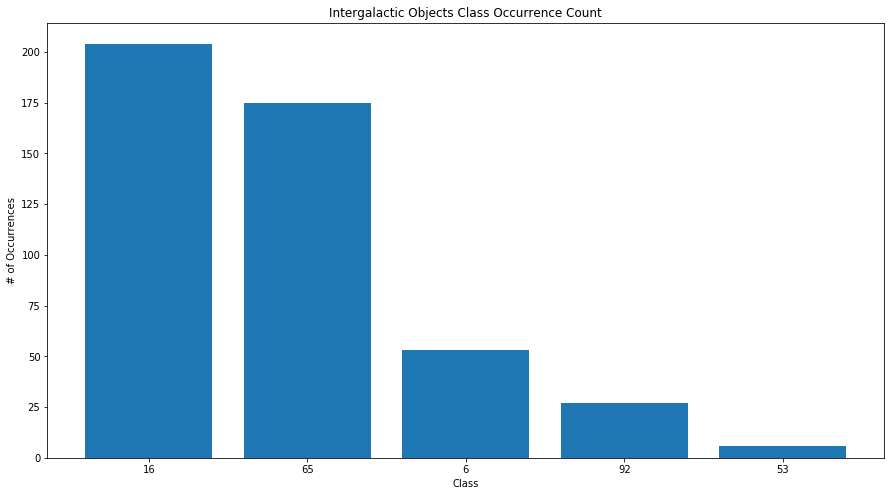

In [195]:
#visualize data

#metadata
ig_test_set_metadata.target.unique()

plt.bar([0, 1, 2, 3, 4], ig_test_set_metadata['target'].value_counts())
plt.xticks([0, 1, 2, 3, 4], ig_test_set_metadata.target.unique())
plt.xlabel('Class')
plt.ylabel('# of Occurrences')
plt.title('Intergalactic Objects Class Occurrence Count')
